In [1]:
#Importez les librairies
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import plotly.express as px

sns.set()

In [2]:
# Importez les fichiers
analyse = pd.read_csv('analyse.csv')
population = pd.read_csv('analyse_population.csv')

#Verifiez le head
analyse.head()

Zone  \
0     Afghanistan   
1  Afrique du Sud   
2         Albanie   
3         Algérie   
4       Allemagne   

   Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53                             
1                                              35.69                             
2                                              16.36                             
3                                               6.38                             
4                                              19.47                             

   PIB (US$) par habitant  Stabilité Politique  \
0              520.616409                -2.80   
1             6680.460869                -0.28   
2             4514.204908                 0.38   
3             4109.696067                -0.92   
4            44651.829102                 0.59   

   Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
0                                           0.705963                    
1                                         261.808033                    
2                                          15.603914                    
3                                         261.808033                    
4                                         685.475196                    

   Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
0                                             0.3632                                        
1                                             0.3164                                        
2                                             0.8127                                        
3                                             1.7491                                        
4                                             0.4118                                        

   Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
0                                           7.946305                                                          
1                                          16.201964                                                          
2                                          23.757276                                                          
3                                          46.581246                                                          
4                                          52.622785

## Classification ascendante hiérarchique

In [3]:
# Séparez les pays
pays = analyse['Zone'].values

In [4]:
# Séparez les valeurs quantitatives
X = analyse.drop(columns='Zone').values
X[:10]

array([[ 1.53000000e+00,  5.20616409e+02, -2.80000000e+00,
         7.05962592e-01,  3.63200000e-01,  7.94630543e+00],
       [ 3.56900000e+01,  6.68046087e+03, -2.80000000e-01,
         2.61808033e+02,  3.16400000e-01,  1.62019637e+01],
       [ 1.63600000e+01,  4.51420491e+03,  3.80000000e-01,
         1.56039136e+01,  8.12700000e-01,  2.37572764e+01],
       [ 6.38000000e+00,  4.10969607e+03, -9.20000000e-01,
         2.61808033e+02,  1.74910000e+00,  4.65812461e+01],
       [ 1.94700000e+01,  4.46518291e+04,  5.90000000e-01,
         6.85475196e+02,  4.11800000e-01,  5.26227846e+01],
       [ 1.05600000e+01,  4.09581169e+03, -3.80000000e-01,
         4.45269404e+01,  3.57560000e+00,  6.62714394e+00],
       [ 5.41000000e+01,  1.53834152e+04,  7.50000000e-01,
         2.02599920e+00,  1.57677000e+01,  5.91033890e+01],
       [ 4.33600000e+01,  2.08024643e+04, -6.40000000e-01,
         2.61808033e+02,  1.00470000e+00,  4.02079334e+01],
       [ 4.22400000e+01,  1.46488460e+04,  1.700

In [5]:
#Instanciez le scaler
std_scale = preprocessing.StandardScaler()

#Entrainez le scaler
std_scale.fit(X)

#Transformez les données
X_scaled = std_scale.transform(X)

In [6]:
#Confirmez que la moyenne est à 0 et l'écart-type à 1
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

0    1    2    3    4    5
mean -0.0  0.0  0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [7]:
#Calculez les distances avec la méthode 'ward'
Z = linkage(X_scaled, method="ward")

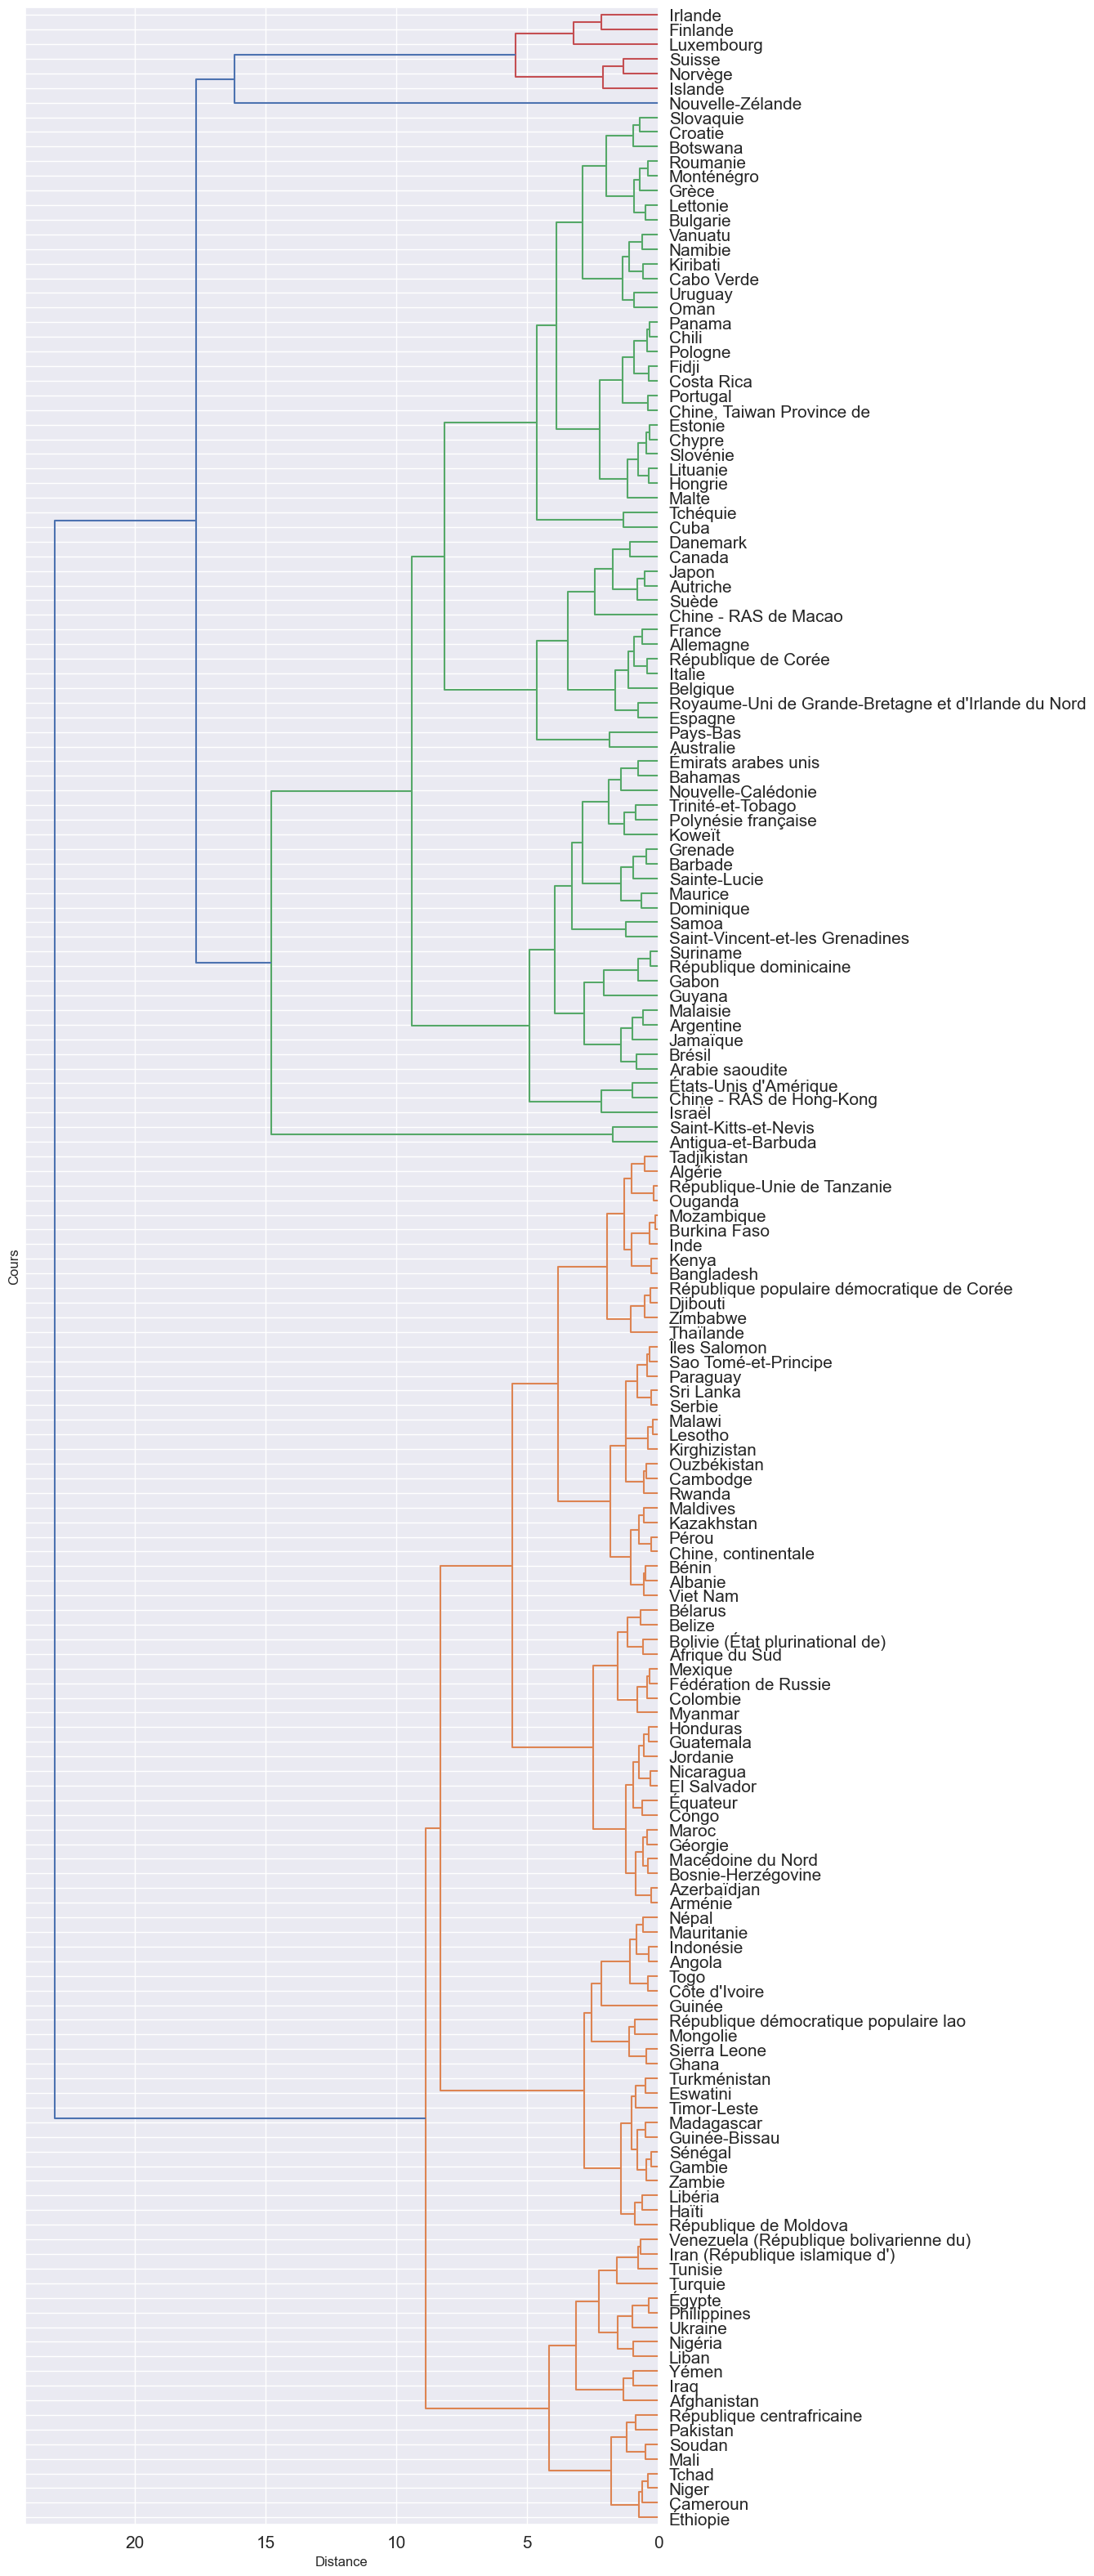

In [8]:
#Créez le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(10, 40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation="left")
ax.set_xlabel("Distance")
ax.set_ylabel("Cours")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

plt.show()

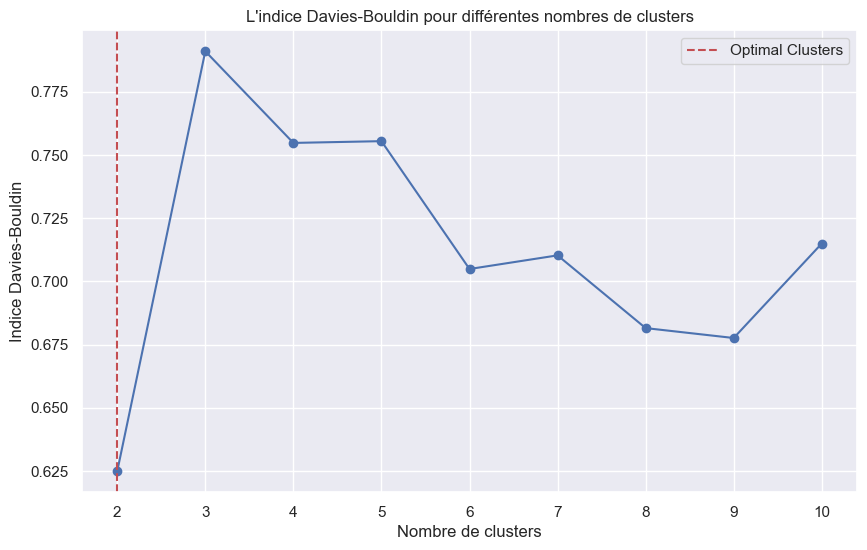

Nombre optimal de clusters: 2


In [9]:
# Spécifiez la plage de numéros de cluster à tester
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Calculez l'indice Davies-Bouldin pour les clusters
davies_bouldin_scores = []

for n_clusters in cluster_range:
    # Effectuez un clustering hiérarchique
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters = clusterer.fit_predict(Z)

    # Calculez l'indice Davies-Bouldin
    db_score = davies_bouldin_score(Z, clusters)
    davies_bouldin_scores.append(db_score)

# Trouvez le nombre optimal des clusters afin de minimiser l'indice Davies-Bouldin
optimal_clusters = cluster_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Créez une graphique avec l'indice de Davies-Bouldin
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title("L'indice Davies-Bouldin pour différentes nombres de clusters")
plt.xlabel('Nombre de clusters')
plt.ylabel('Indice Davies-Bouldin')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

print(f"Nombre optimal de clusters: {optimal_clusters}")

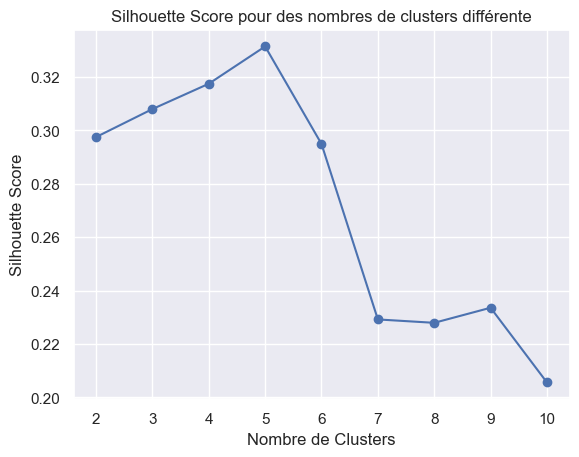

In [10]:
silhouette_scores = []

for n_clusters in range(2, 11):
    # Perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour des nombres de clusters différente')
plt.show()

In [11]:
# Définissez le nombre de clusters
k=3

# Puis définissez les clusters
clusters = fcluster(Z, k, criterion='maxclust')

In [12]:
#Créez une table de contingence
crosstab = pd.crosstab(pays, clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="Pays", inplace=True)
crosstab

cluster                1  2  3
Pays                          
Afghanistan            1  0  0
Afrique du Sud         1  0  0
Albanie                1  0  0
Algérie                1  0  0
Allemagne              0  1  0
...                   .. .. ..
Émirats arabes unis    0  1  0
Équateur               1  0  0
États-Unis d'Amérique  0  1  0
Éthiopie               1  0  0
Îles Salomon           1  0  0

[172 rows x 3 columns]

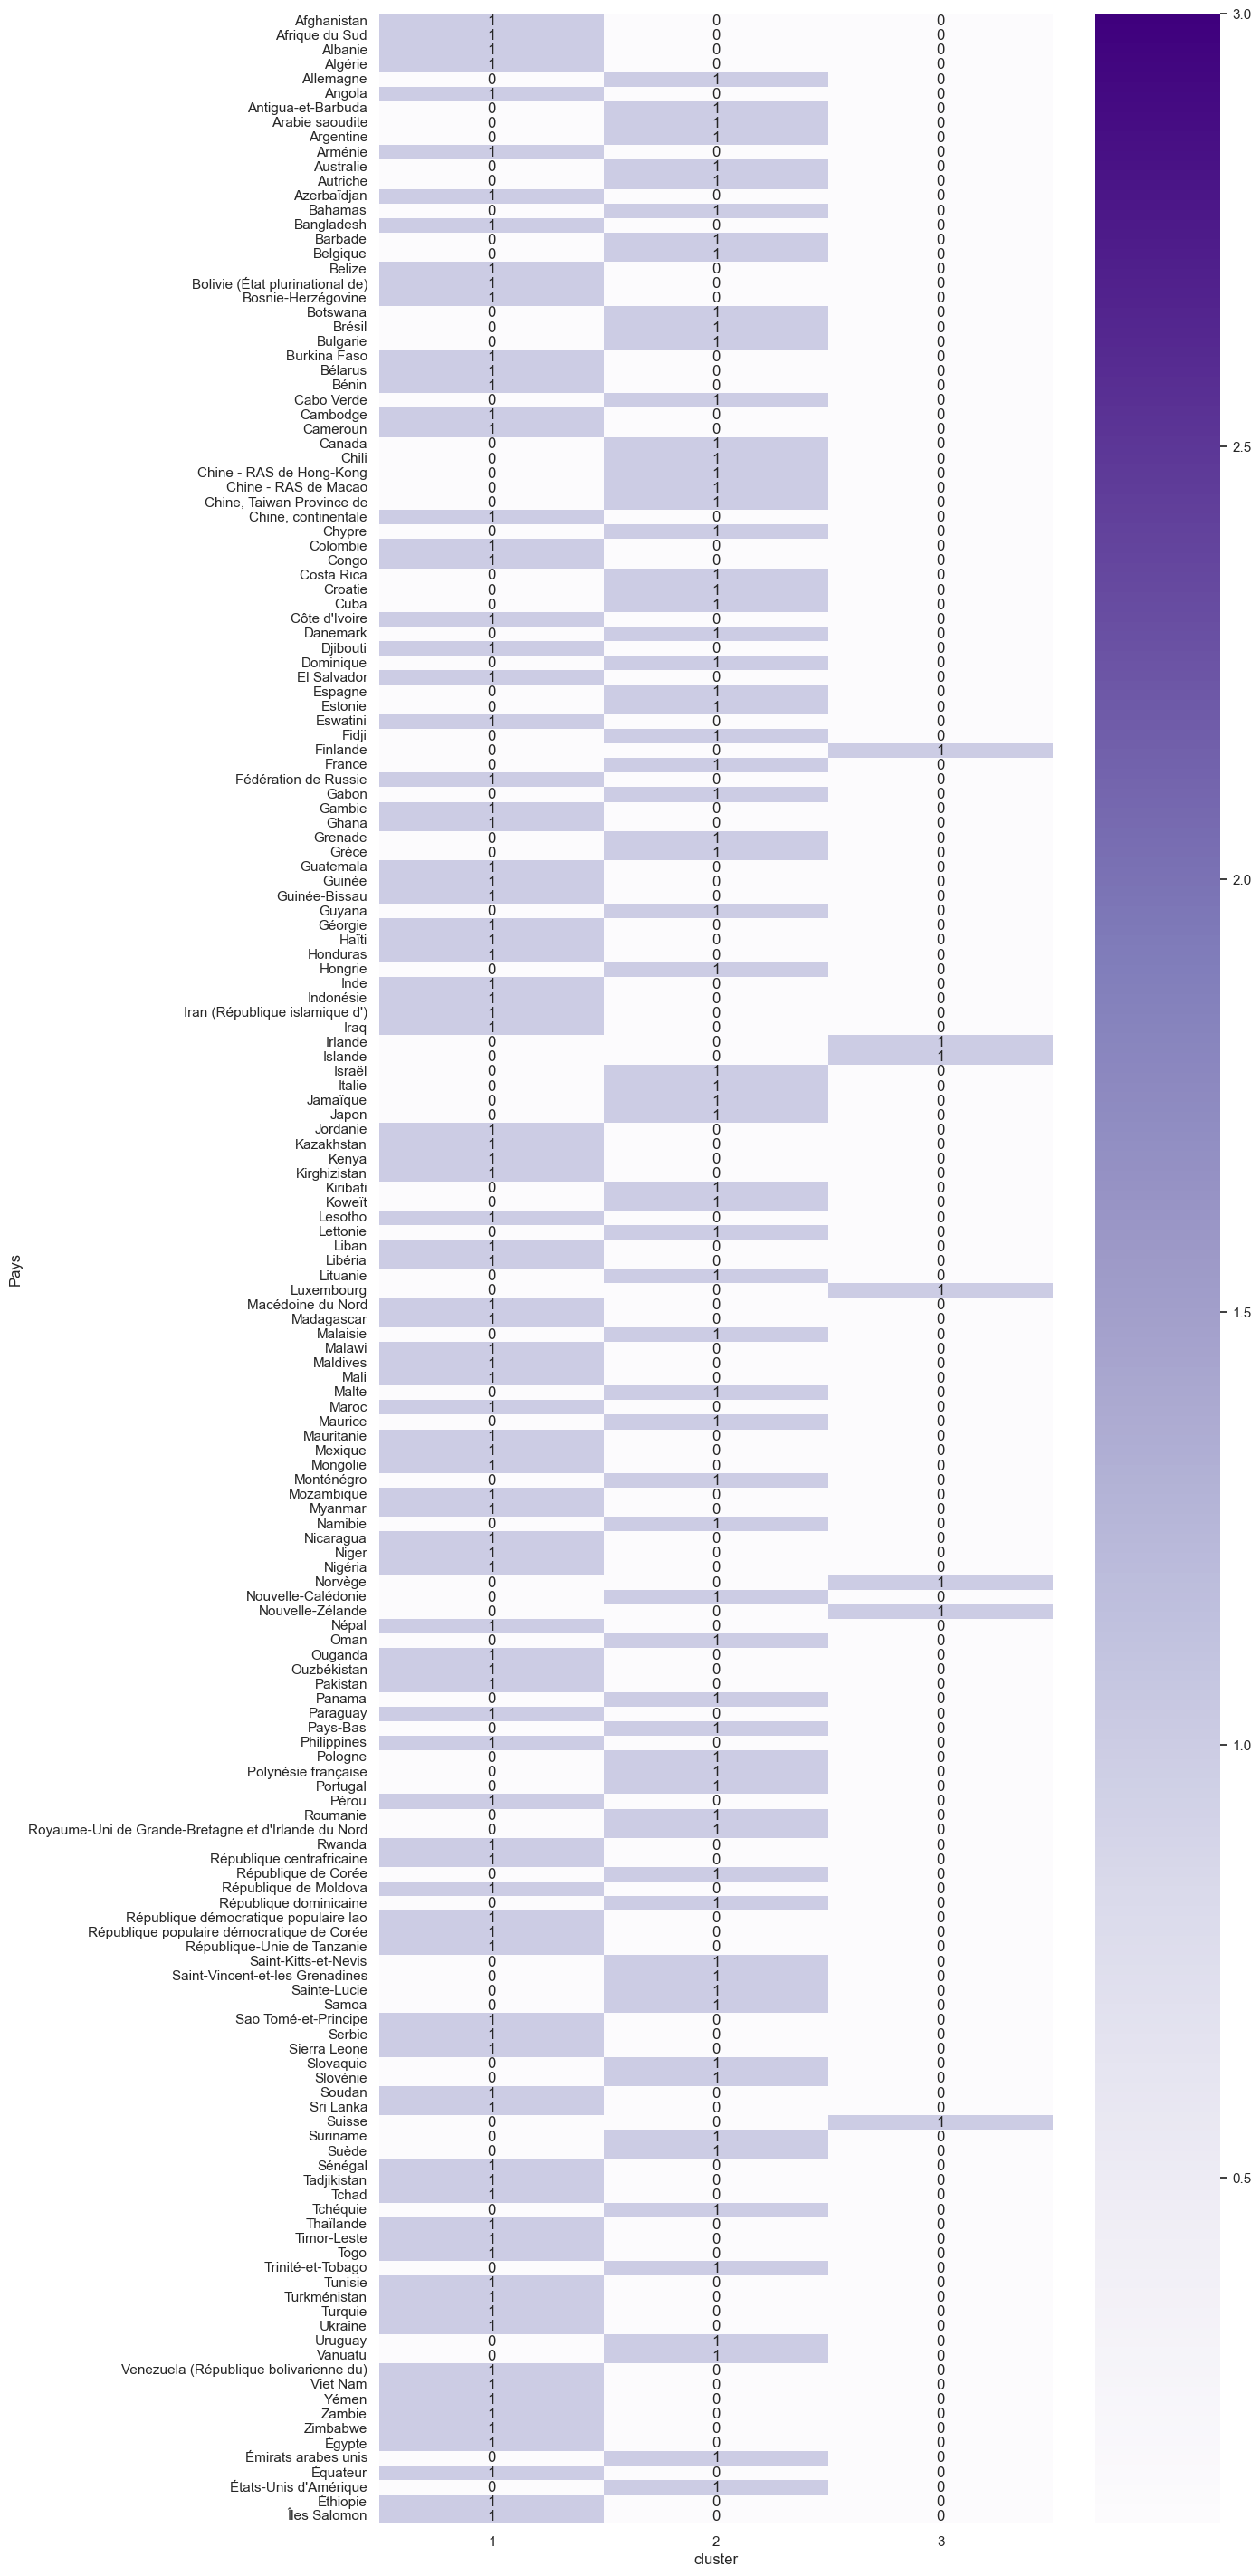

In [13]:
#Créez un heatmap avec le crosstab
fig, ax = plt.subplots(1,1, figsize=(12,36))
ax = sns.heatmap(crosstab, vmin=0.1, vmax=3, annot=True, cmap="Purples")

In [14]:
#Ajoutez le cluster qui correspond à chaque pays
df_CAH = pd.DataFrame({"pays" : pays, "cluster" : clusters})

In [15]:
#Montrez les pays dans chaque cluster
for i in range(1, 4) : 
    # Faites une selection
    sub_df = df_CAH.loc[df_CAH.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    pays_list = sub_df['pays'].values

    # Créez une liste de couple nom/theme
    txt = [f"{name}" for name in pays_list]

    # Transformez en string
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")

cluster : 1
Afghanistan / Afrique du Sud / Albanie / Algérie / Angola / Arménie / Azerbaïdjan / Bangladesh / Belize / Bolivie (État plurinational de) / Bosnie-Herzégovine / Burkina Faso / Bélarus / Bénin / Cambodge / Cameroun / Chine, continentale / Colombie / Congo / Côte d'Ivoire / Djibouti / El Salvador / Eswatini / Fédération de Russie / Gambie / Ghana / Guatemala / Guinée / Guinée-Bissau / Géorgie / Haïti / Honduras / Inde / Indonésie / Iran (République islamique d') / Iraq / Jordanie / Kazakhstan / Kenya / Kirghizistan / Lesotho / Liban / Libéria / Macédoine du Nord / Madagascar / Malawi / Maldives / Mali / Maroc / Mauritanie / Mexique / Mongolie / Mozambique / Myanmar / Nicaragua / Niger / Nigéria / Népal / Ouganda / Ouzbékistan / Pakistan / Paraguay / Philippines / Pérou / Rwanda / République centrafricaine / République de Moldova / République démocratique populaire lao / République populaire démocratique de Corée / République-Unie de Tanzanie / Sao Tomé-et-Principe / Serbie / 

In [16]:
#Faites une jointure entre les clusters et le fichier 'analyse'
analyse_CAH = pd.merge(df_CAH, analyse, left_on='pays', right_on='Zone', how='left').drop(columns='Zone')

#Créez les dataframes 'cluster1' et 'cluster2'
cluster1 = analyse_CAH.loc[analyse_CAH['cluster']==1].drop(columns='cluster')
cluster2 = analyse_CAH.loc[analyse_CAH['cluster']==2].drop(columns='cluster')
cluster3 = analyse_CAH.loc[analyse_CAH['cluster']==3].drop(columns='cluster')

In [17]:
#Regardez les valeurs de chaque colonne de Cluster 1
cluster1.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          94.000000                             
mean                                           10.992128                             
std                                             9.428647                             
min                                             0.130000                             
25%                                             2.927500                             
50%                                             7.855000                             
75%                                            16.615000                             
max                                            36.000000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               94.000000            94.000000   
mean              3208.701342            -0.642553   
std               2621.372703             0.725759   
min                450.900697            -2.940000   
25%               1110.700171            -0.930000   
50%               2240.876301            -0.515000   
75%               4234.952392            -0.092500   
max              10817.003315             0.790000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          94.000000                    
mean                                          127.657218                    
std                                           120.875673                    
min                                             0.239632                    
25%                                            15.780070                    
50%                                            83.416275                    
75%                                           261.808033                    
max                                           574.153603                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          94.000000                                        
mean                                            1.568115                                        
std                                             1.372310                                        
min                                             0.000000                                        
25%                                             0.396250                                        
50%                                             1.124800                                        
75%                                             2.424975                                        
max                                             6.743400                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          94.000000                                                          
mean                                           23.296896                                                          
std                                            21.274666                                                          
min                                             1.275991                                                          
25%                                             6.958895                                                          
50%                                            15.654978                                                          
75%                                            34.995588                                                          
max                                           104.053370

In [18]:
#Regardez les valeurs de chaque colonne de Cluster 2
cluster2.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          71.000000                             
mean                                           32.127042                             
std                                            15.264819                             
min                                             3.390000                             
25%                                            19.900000                             
50%                                            30.300000                             
75%                                            43.265000                             
max                                            72.310000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               71.000000            71.000000   
mean             22827.124994             0.579718   
std              16982.667101             0.453740   
min               1648.434906            -0.890000   
25%              10040.757973             0.285000   
50%              17404.023659             0.650000   
75%              32352.025134             0.915000   
max              81018.552734             1.430000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          71.000000                    
mean                                          290.999432                    
std                                           377.117124                    
min                                             2.025999                    
25%                                            87.894577                    
50%                                           261.808033                    
75%                                           261.808033                    
max                                          2291.704118                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          71.000000                                        
mean                                            1.269815                                        
std                                             2.458214                                        
min                                             0.032400                                        
25%                                             0.277450                                        
50%                                             0.463300                                        
75%                                             1.525700                                        
max                                            15.767700                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          71.000000                                                          
mean                                           64.076642                                                          
std                                            42.640650                                                          
min                                             0.000000                                                          
25%                                            42.320342                                                          
50%                                            52.622785                                                          
75%                                            76.515314                                                          
max                                           267.514953

In [19]:
#Regardez les valeurs de chaque colonne de Cluster 2
cluster3.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                           7.000000                             
mean                                           23.202857                             
std                                             7.110536                             
min                                            15.720000                             
25%                                            18.545000                             
50%                                            19.050000                             
75%                                            27.885000                             
max                                            34.790000                             

       PIB (US$) par habitant  Stabilité Politique  \
count                7.000000             7.000000   
mean             72085.325618             1.255714   
std              22764.139497             0.198566   
min              43943.484628             1.000000   
25%              58576.507401             1.125000   
50%              73949.769215             1.260000   
75%              79266.914217             1.340000   
max             111017.182246             1.600000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                           7.000000                    
mean                                         1767.177638                    
std                                          3275.143674                    
min                                           261.808033                    
25%                                           261.808033                    
50%                                           339.003923                    
75%                                          1049.402869                    
max                                          9147.009709                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                           7.000000                                        
mean                                            0.241414                                        
std                                             0.140373                                        
min                                             0.007800                                        
25%                                             0.162400                                        
50%                                             0.293400                                        
75%                                             0.316400                                        
max                                             0.431100                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                           7.000000                                                          
mean                                          330.252736                                                          
std                                           161.736204                                                          
min                                           102.479055                                                          
25%                                           224.182132                                                          
50%                                           305.818643                                                          
75%                                           448.151814                                                          
max                                           558.803563

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


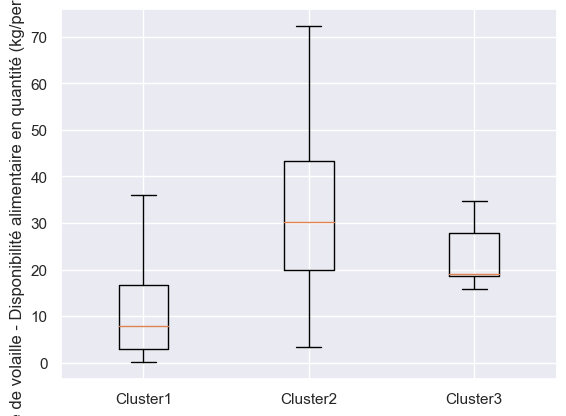

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


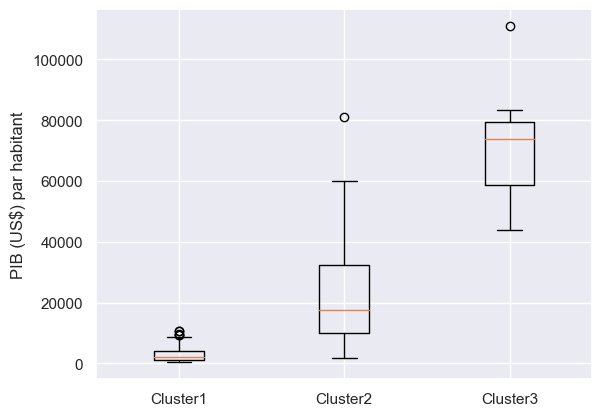

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


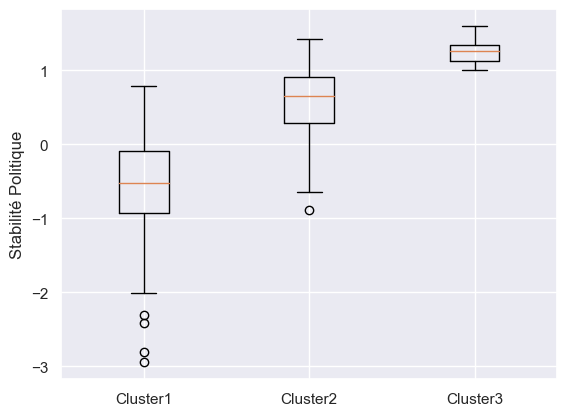

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


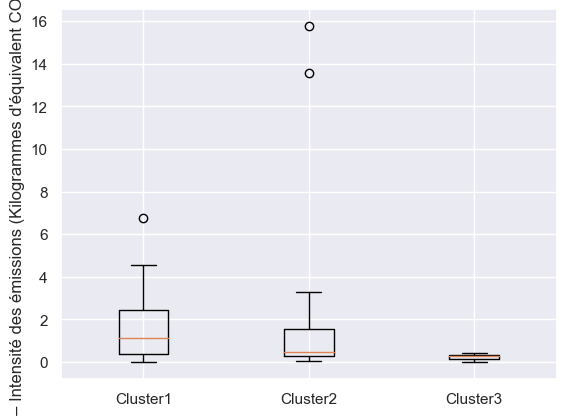

-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


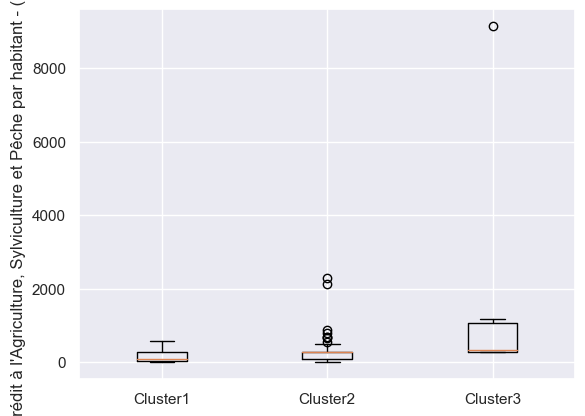

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


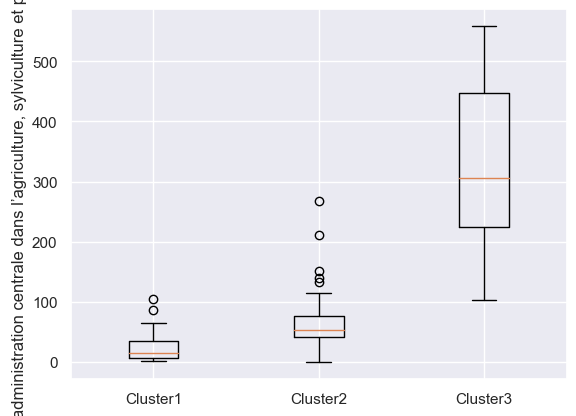

In [20]:
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters = [('Cluster1', cluster1), ('Cluster2', cluster2), ('Cluster3', cluster3)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters]
    labels = [cluster_name for cluster_name, _ in clusters]

    plt.boxplot(data, labels=labels)
    plt.ylabel(column)
    plt.show()

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


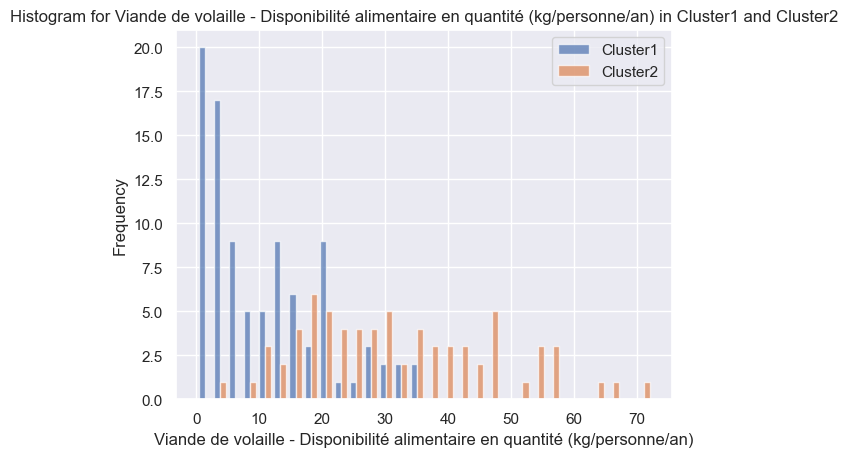

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


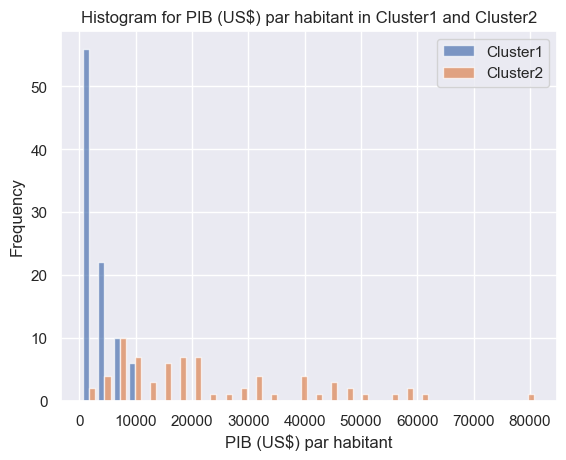

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


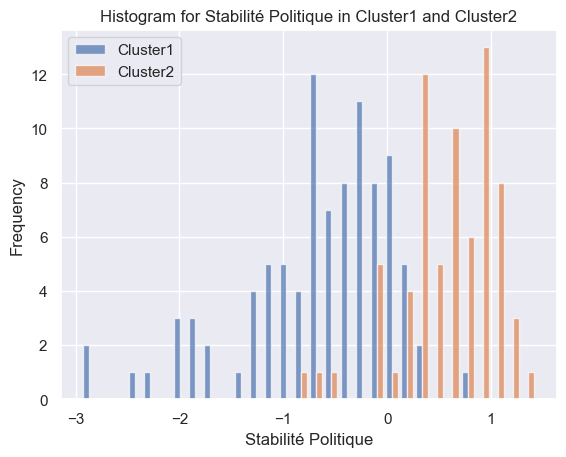

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


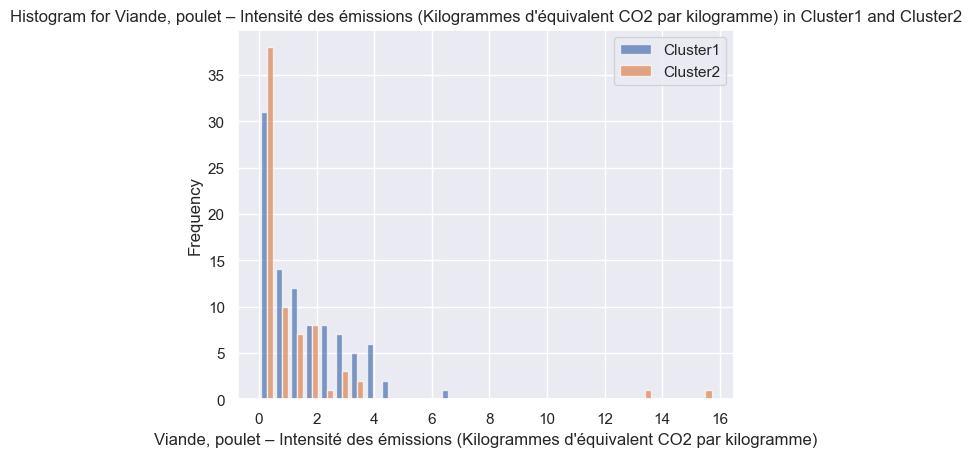

-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


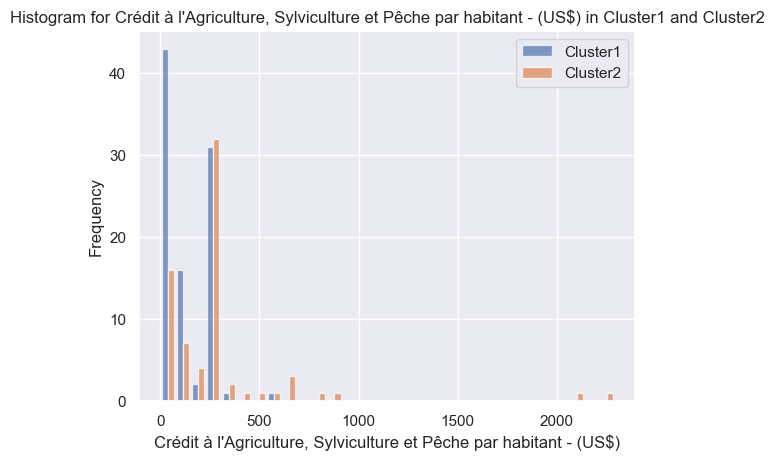

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


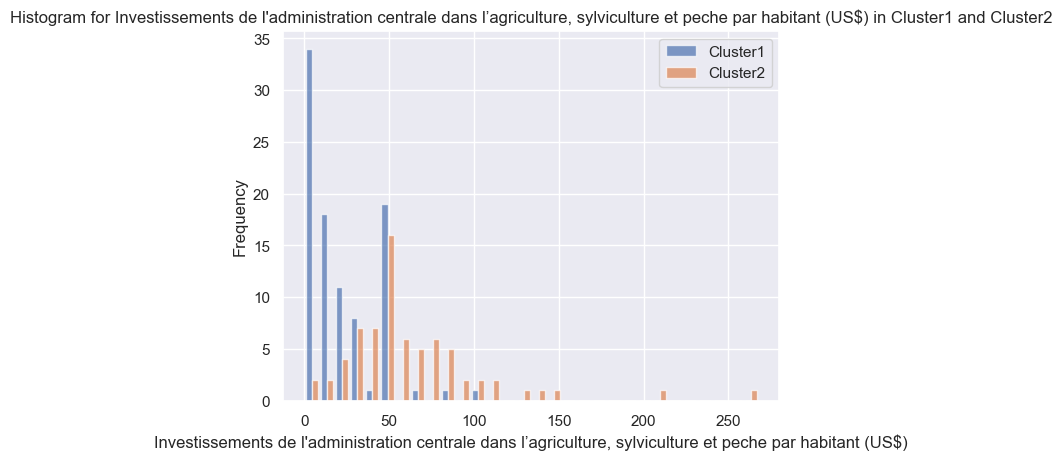

In [21]:
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters = [('Cluster1', cluster1), ('Cluster2', cluster2)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters]

    plt.hist(data, bins=30, alpha=0.7, label=[cluster_name for cluster_name, _ in clusters])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {column} in Cluster1 and Cluster2")
    plt.legend()
    plt.show()

- Cluster 1 - Moins de poulet disponible, PIB par habitant plus faible, stabilité politique plus faible, proportion de poulet disponible plus faible par rapport à la viande totale disponible, émissions plus élevées, moins d'accès au crédit agricole, moins d'investissement du gouvernement central dans l'agriculture
- Cluster 2 – Plus de poulet disponible, PIB par habitant plus élevé, plus grande stabilité politique, proportion plus élevée de poulet disponible par rapport à la viande totale disponible, émissions plus faibles, avec 2 valeurs aberrantes élevées, plus d'accès au crédit agricole, plus d'investissements du gouvernement central dans l'agriculture


## La méthode des k-means
N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes.

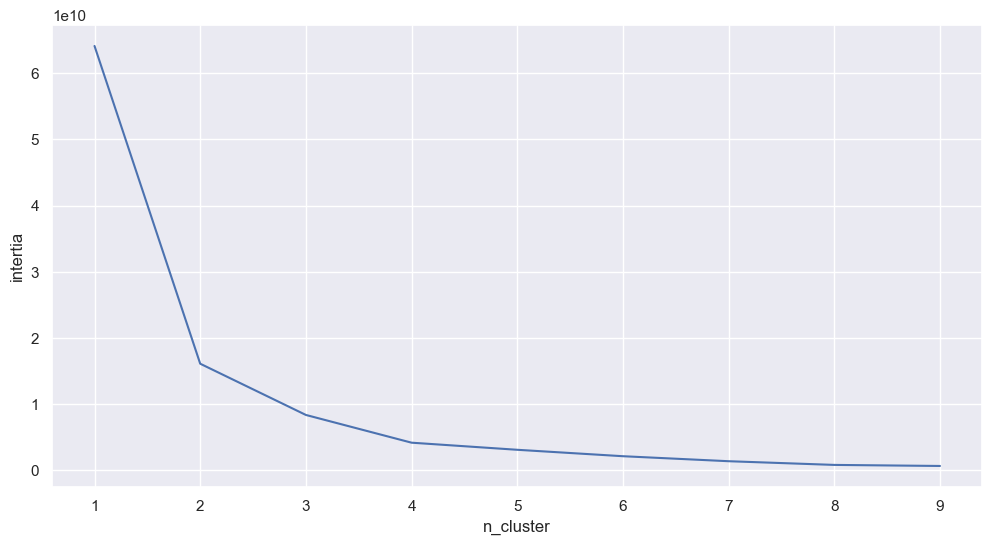

In [22]:
# Il existe une fuite de mémoire connue dans Windows lorsque vous utilisez la fonction k-mean. Il s'agit d'une solution de contournement.
os.environ['OMP_NUM_THREADS'] = '1'

# Créez une liste pour enregistrer les inerties
inertia_list = [ ]

# Créez une liste avec le nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # Instanciez un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # Entrainez
    kmeans.fit(X)
    
    # Enregistrez l'inertie obtenue 
    inertia_list.append(kmeans.inertia_)
    
#Créez une graphique avec qui trace l'inertie intraclasse en fonction du nombre de clusters
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list)

Je devrais sélectionner la valeur k après quoi l'inertie commence à diminuer de manière linéaire - je peux voir ici que k devrait = 4.

In [23]:
# Instanciez le k-means avec 4 clusters
kmeans = KMeans(n_clusters=4,n_init=10)

# Entrainez le k-means 
kmeans.fit(X)

# Mettre le k-means dans la variable 'labels'
labels = kmeans.labels_ + 1
labels

array([1, 1, 1, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 4, 3, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 4, 4, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 4,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2,
       1, 3, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 1, 2, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1])

In [24]:
# Stockez les centroids dans la variable 'centroids' 
centroids = kmeans.cluster_centers_

In [25]:
#Créez une ACP et l'entrainez
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [26]:
#Instanciez le scaler
scaler = StandardScaler()

#Entrainez le scaler et transformez les données
X_scaled = scaler.fit_transform(X)

In [27]:
#Projettez les points dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]

PC1       PC2       PC3       PC4
0 -2.635226 -1.345041 -0.404487  0.449000
1 -0.105763 -0.062146  0.216609 -1.177497
2 -0.340909 -0.135179 -0.144618 -0.410748
3 -1.155205 -0.361969 -0.001596  0.669939
4  1.458211 -0.614276  0.155423  0.064284
5 -1.239686  0.735635  0.276726  0.526365
6  0.009255  7.432008  1.957068  2.045175
7  0.367743  0.333824  0.117607 -0.980971
8  0.527714  0.114293  0.166551 -1.510127
9 -0.838725 -0.551231 -0.182074 -0.303360

In [28]:
#Projettez les points dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]
# Utilisez le scaler avec les centroids 
centroids_scaled = scaler.fit_transform(centroids)

# Utilisez l'ACP avec les centroids
centroids_proj = pca.transform(centroids_scaled)

# Créez un dataframe avec les centroids_proj
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])

In [29]:
# Utilisez le scaler avec les centroids 
centroids_scaled = scaler.fit_transform(centroids)

# Utilisez l'ACP avec les centroids
centroids_proj = pca.transform(centroids_scaled)

# Créez un dataframe avec les centroids_proj
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])

In [30]:
centroids_proj

F1        F2        F3        F4
cluster_0 -2.776450  0.200591 -0.376912  0.818045
cluster_1  1.064028 -0.868911  1.386621 -0.947632
cluster_2 -0.571211  1.495588  0.079444 -0.518298
cluster_3  2.283633 -0.827268 -1.089154  0.647885

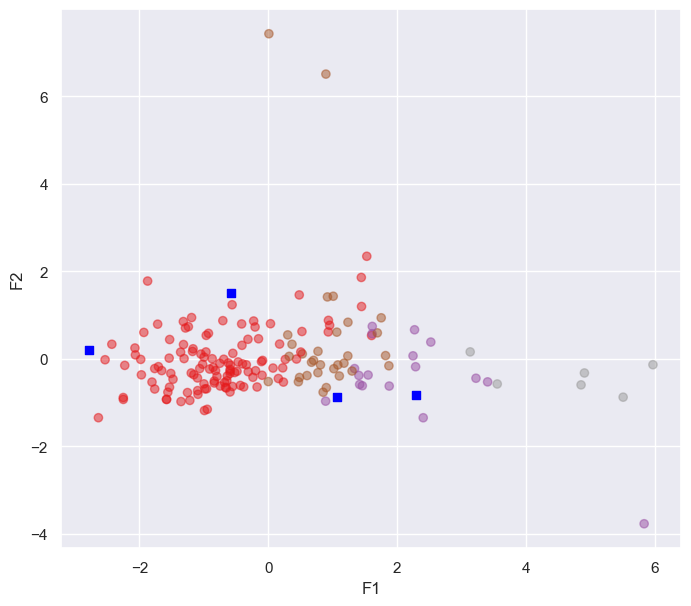

In [31]:
# Créez le scatterplot avec des centroids
#Definez le figure et son axe
fig, ax = plt.subplots(1,1, figsize=(8,7))

# Affichez lesindividus, avec une transparence de 50% 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# Affichez les centroides, en noire et avec une forme de carré
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="blue" )

# Créez la graphique
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

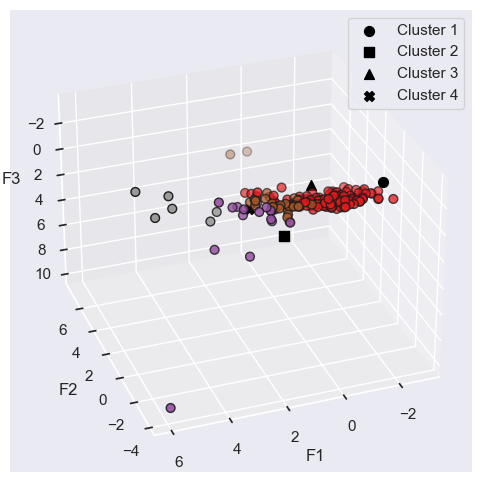

In [32]:
#Créez une graphique en 3D. 
# Definissez le figure et l'axe 
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Affichez les points
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40
)

# Ajoutez les centroids
shapes = ['o', 's', '^', 'X']
for i, centroid in enumerate(centroids_proj.values):
    ax.scatter(
        centroid[0],
        centroid[1],
        centroid[2],
        c="black", marker=shapes[i % len(shapes)], s=50, label=f"Cluster {i + 1}"
    )

# Spécifiez le nom des axes
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.legend()

plt.show()

In [33]:
# Créez un nouveau dataframe pour l'analyse k-means avec les colonnes 'Zone' et 'Cluster'
df_kmeans = analyse.copy()
df_kmeans['Cluster'] = labels
df_kmeans = df_kmeans[['Zone', 'Cluster']]

In [34]:
#Affichez les pays dans chaque cluster
for i in range(1, 5) : 
    # Faites une selection
    sub_df = df_kmeans.loc[df_kmeans['Cluster'] == i]

    # print le nombre du cluster
    print(f"Cluster : {i}")

    # Extrayez les pays dans le cluster
    pays_list = sub_df['Zone'].values

    # Créez une liste des pays dans chaque cluster
    txt = [f"{name}" for name in pays_list]

    # Transformez en string
    txt = " / ".join(txt)
 
    # Print les clusters et les pays
    print(txt)
    print("\n\n")

Cluster : 1
Afghanistan / Afrique du Sud / Albanie / Algérie / Angola / Arménie / Azerbaïdjan / Bangladesh / Belize / Bolivie (État plurinational de) / Bosnie-Herzégovine / Botswana / Brésil / Bulgarie / Burkina Faso / Bélarus / Bénin / Cabo Verde / Cambodge / Cameroun / Chine, continentale / Colombie / Congo / Costa Rica / Cuba / Côte d'Ivoire / Djibouti / Dominique / El Salvador / Eswatini / Fidji / Fédération de Russie / Gabon / Gambie / Ghana / Grenade / Guatemala / Guinée / Guinée-Bissau / Guyana / Géorgie / Haïti / Honduras / Inde / Indonésie / Iran (République islamique d') / Iraq / Jamaïque / Jordanie / Kazakhstan / Kenya / Kirghizistan / Kiribati / Lesotho / Liban / Libéria / Macédoine du Nord / Madagascar / Malaisie / Malawi / Maldives / Mali / Maroc / Maurice / Mauritanie / Mexique / Mongolie / Monténégro / Mozambique / Myanmar / Namibie / Nicaragua / Niger / Nigéria / Népal / Ouganda / Ouzbékistan / Pakistan / Paraguay / Philippines / Pérou / Roumanie / Rwanda / République 

In [35]:
cluster1 = df_kmeans.loc[df_kmeans['Cluster']==1]
cluster2 = df_kmeans.loc[df_kmeans['Cluster']==2]
cluster3 = df_kmeans.loc[df_kmeans['Cluster']==3]
cluster4 = df_kmeans.loc[df_kmeans['Cluster']==4]

cluster1 = pd.merge(cluster1, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster2 = pd.merge(cluster2, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster3 = pd.merge(cluster3, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster4 = pd.merge(cluster4, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])

In [36]:
#Regardez les valeurs de chaque colonne de Cluster 1
cluster1.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                         118.000000                             
mean                                           15.390085                             
std                                            14.368705                             
min                                             0.130000                             
25%                                             3.685000                             
50%                                            11.995000                             
75%                                            21.575000                             
max                                            72.310000                             

       PIB (US$) par habitant  Stabilité Politique  \
count              118.000000           118.000000   
mean              4064.948319            -0.405424   
std               3140.110138             0.826594   
min                450.900697            -2.940000   
25%               1385.805021            -0.767500   
50%               3312.091996            -0.310000   
75%               6191.356474             0.090000   
max              12225.577172             1.200000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                         118.000000                    
mean                                          131.720998                    
std                                           118.403966                    
min                                             0.239632                    
25%                                            22.340957                    
50%                                            91.100293                    
75%                                           261.808033                    
max                                           574.153603                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                         118.000000                                        
mean                                            1.533114                                        
std                                             1.303395                                        
min                                             0.000000                                        
25%                                             0.415275                                        
50%                                             1.162500                                        
75%                                             2.381425                                        
max                                             6.743400                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                         118.000000                                                          
mean                                           30.706451                                                          
std                                            33.639362                                                          
min                                             1.275991                                                          
25%                                             7.795867                                                          
50%                                            22.580495                                                          
75%                                            52.214409                                                          
max                                           267.514953

In [37]:
#Regardez les valeurs de chaque colonne de Cluster 2
cluster2.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          17.000000                             
mean                                           32.343529                             
std                                            16.302052                             
min                                            12.650000                             
25%                                            18.760000                             
50%                                            28.980000                             
75%                                            43.470000                             
max                                            67.390000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               17.000000            17.000000   
mean             47028.830993             0.714706   
std               6642.226363             0.540487   
min              38672.407740            -0.890000   
25%              43096.069694             0.430000   
50%              44906.748920             0.870000   
75%              48989.638816             1.050000   
max              59914.642691             1.600000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          17.000000                    
mean                                         1101.044152                    
std                                          2171.536794                    
min                                            61.047445                    
25%                                           261.808033                    
50%                                           339.003923                    
75%                                           685.475196                    
max                                          9147.009709                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          17.000000                                        
mean                                            0.351412                                        
std                                             0.292915                                        
min                                             0.041400                                        
25%                                             0.197700                                        
50%                                             0.272000                                        
75%                                             0.373500                                        
max                                             1.324200                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          17.000000                                                          
mean                                           75.062922                                                          
std                                            63.430181                                                          
min                                             0.000000                                                          
25%                                            52.622785                                                          
50%                                            61.363334                                                          
75%                                            72.335881                                                          
max                                           305.818643

In [38]:
#Regardez les valeurs de chaque colonne de Cluster 3
cluster3.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          31.000000                             
mean                                           31.209355                             
std                                            13.238418                             
min                                             9.120000                             
25%                                            21.445000                             
50%                                            30.300000                             
75%                                            42.705000                             
max                                            55.770000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               31.000000            31.000000   
mean             21048.395320             0.570968   
std               6240.312748             0.406188   
min              13465.399460            -0.640000   
25%              16204.195692             0.295000   
50%              19451.524847             0.650000   
75%              24176.476494             0.885000   
max              33101.384337             1.250000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          31.000000                    
mean                                          245.939207                    
std                                           178.087919                    
min                                             2.025999                    
25%                                           135.333784                    
50%                                           261.808033                    
75%                                           261.808033                    
max                                           798.771978                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          31.000000                                        
mean                                            1.625890                                        
std                                             3.567521                                        
min                                             0.032400                                        
25%                                             0.248400                                        
50%                                             0.422300                                        
75%                                             1.263100                                        
max                                            15.767700                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          31.000000                                                          
mean                                           70.825607                                                          
std                                            42.361509                                                          
min                                            13.247033                                                          
25%                                            44.293966                                                          
50%                                            57.076904                                                          
75%                                            89.292867                                                          
max                                           211.338485

In [39]:
#Regardez les valeurs de chaque colonne de Cluster 4
cluster4.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                            6.00000                             
mean                                            23.89000                             
std                                              7.39558                             
min                                             15.72000                             
25%                                             18.51000                             
50%                                             22.43500                             
75%                                             28.91750                             
max                                             34.47000                             

       PIB (US$) par habitant  Stabilité Politique  \
count                6.000000             6.000000   
mean             82547.799426             1.256667   
std              14695.693545             0.153319   
min              70767.463926             1.000000   
25%              74267.530521             1.192500   
50%              78119.683588             1.295000   
75%              82739.398677             1.345000   
max             111017.182246             1.430000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                           6.000000                    
mean                                          524.339645                    
std                                           413.776498                    
min                                           261.808033                    
25%                                           261.808033                    
50%                                           261.808033                    
75%                                           762.222130                    
max                                          1169.778908                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                           6.000000                                        
mean                                            0.327583                                        
std                                             0.242568                                        
min                                             0.007800                                        
25%                                             0.213750                                        
50%                                             0.305750                                        
75%                                             0.402850                                        
max                                             0.727900                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                           6.000000                                                          
mean                                          326.015707                                                          
std                                           190.496403                                                          
min                                            52.622785                                                          
25%                                           208.753812                                                          
50%                                           349.606358                                                          
75%                                           450.140749                                                          
max                                           558.803563

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


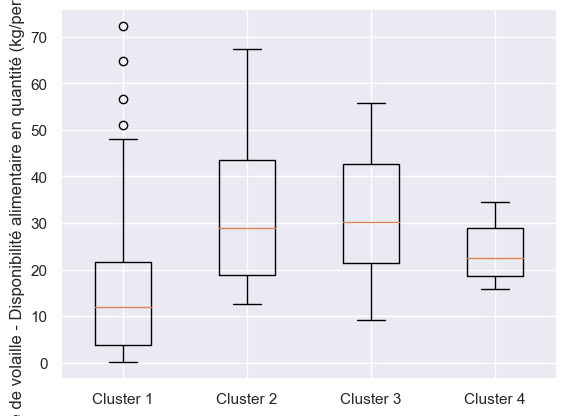

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


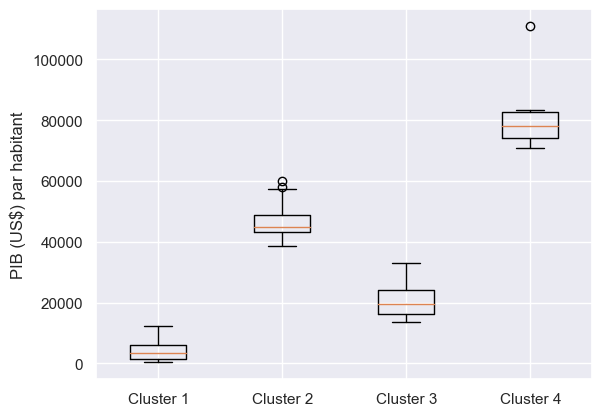

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


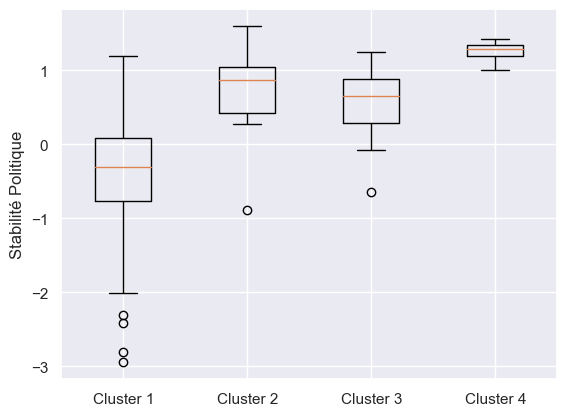

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


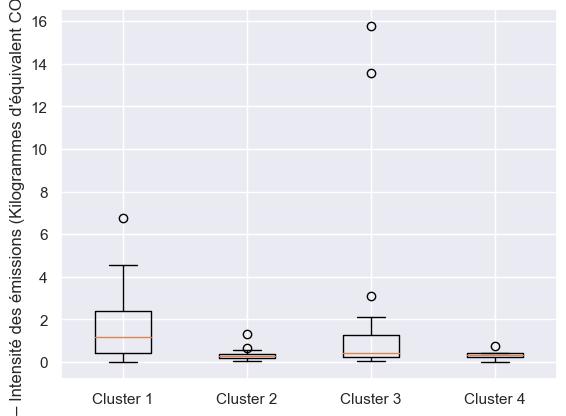

-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


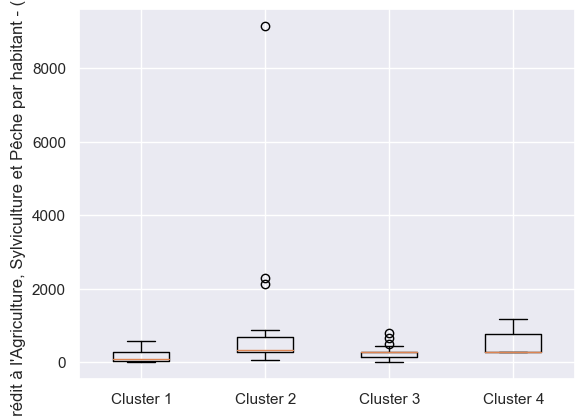

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


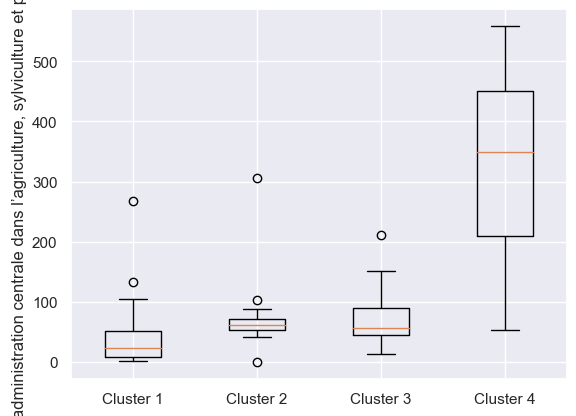

In [40]:
#Créez des boxplots pour chaque colonne et chaque cluster
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters_kmeans = [('Cluster 1', cluster1), ('Cluster 2', cluster2), ('Cluster 3', cluster3), ('Cluster 4', cluster4)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters_kmeans]
    labels = [cluster_name for cluster_name, _ in clusters_kmeans]

    plt.boxplot(data, labels=labels)
    plt.ylabel(column)
    plt.show()

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


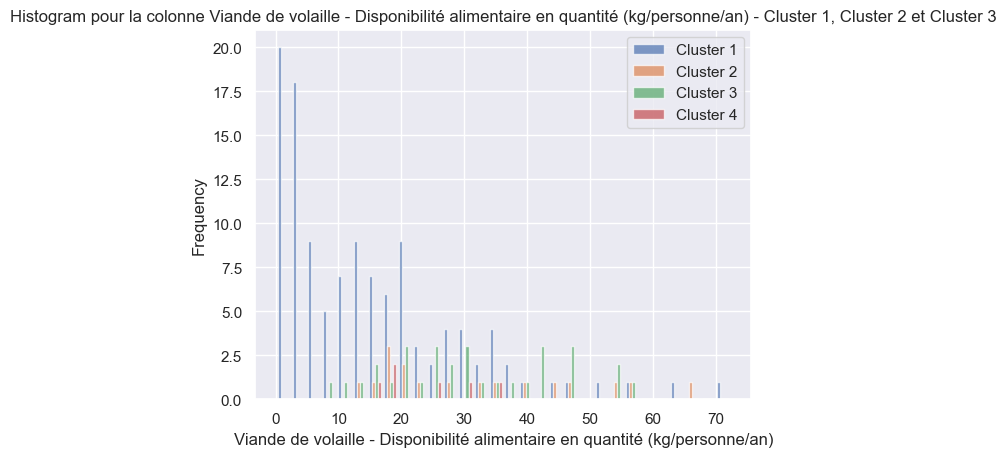

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


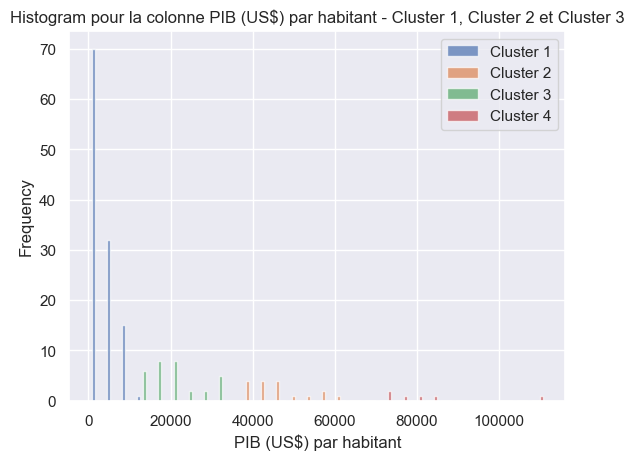

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


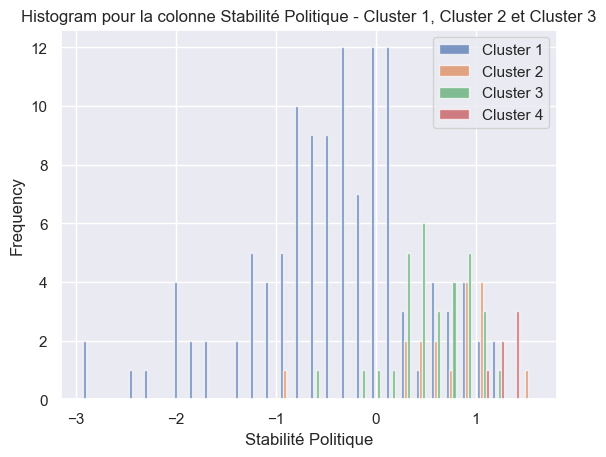

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


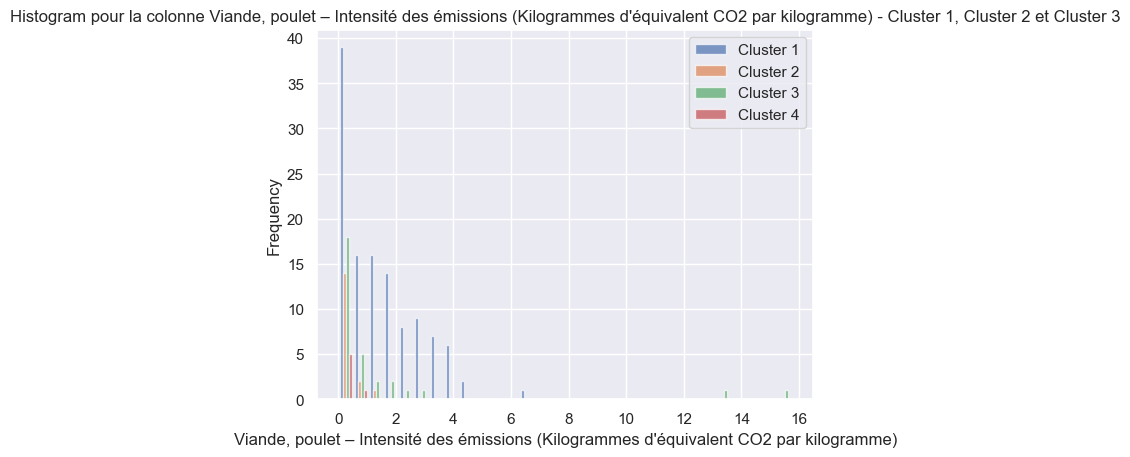

-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


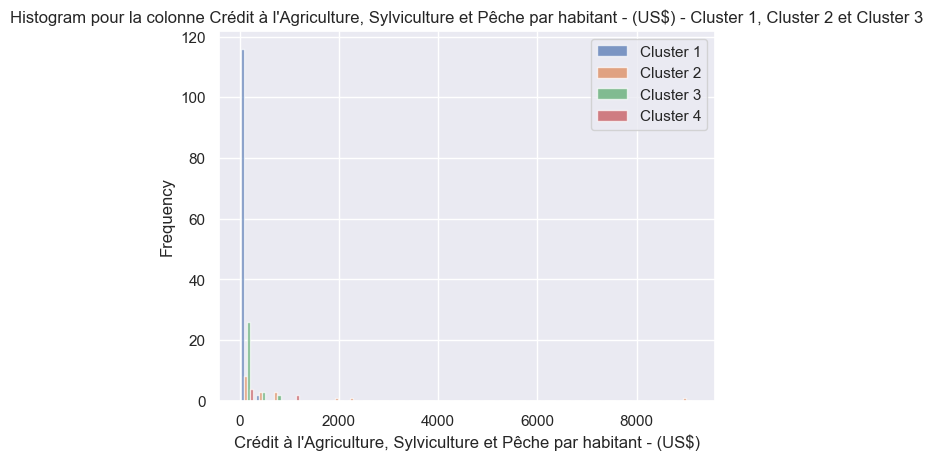

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


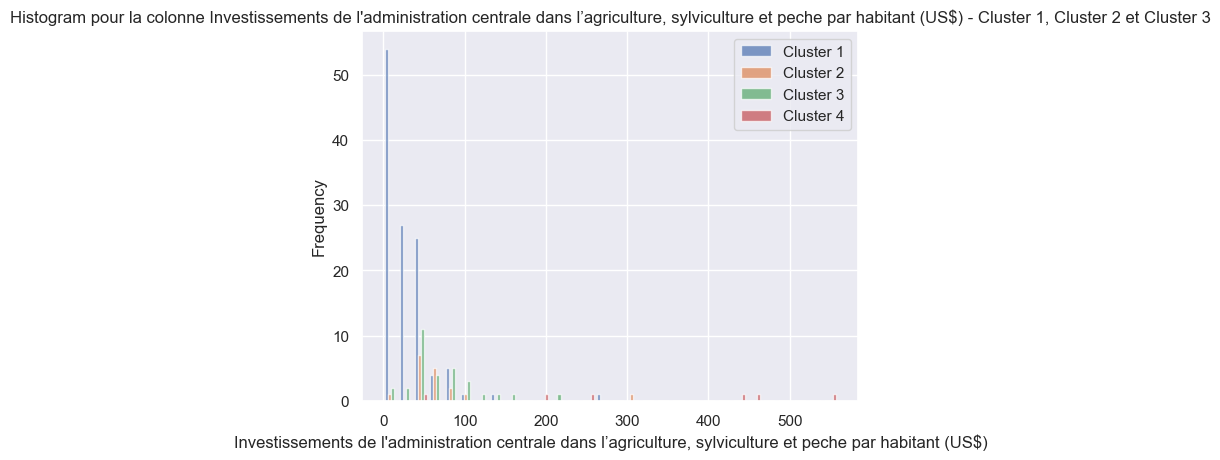

In [41]:
#Créez des histogrames pour chaque colonne et chaque cluster

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters_kmeans]

    plt.hist(data, bins=30, alpha=0.7, label=[cluster_name for cluster_name, _ in clusters_kmeans])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram pour la colonne {column} - Cluster 1, Cluster 2 et Cluster 3")
    plt.legend()
    plt.show()
    

UPDATE 

- 1 – Faible revenu, politiquement instable, faible disponibilité de poulet, faible crédit et investissement
- 2 – Revenu élevé, stabilité politique moyenne, disponibilité élevée de poulet, crédit élevé disponible et faibles émissions
- 3 – Revenu moyen, stabilité politique moyenne, disponibilité élevée de poulet, émissions moyennes, crédit et investissement moyens.
- 4 – Revenu élevé, politiquement stable, faible consommation de poulet


Cluster 2 est le meilleur
- Pays à examiner - k-means

    - Allemagne / Australie / Autriche / Belgique / Canada / Chine - RAS de Hong-Kong / Danemark / Finlande / France / Israël / Japon / Nouvelle-Zélande / Pays-Bas / Royaume-Uni de Grande-Bretagne et d'Irlande du Nord / Suède / Émirats arabes unis / États-Unis d'Amérique
    
- Pays à examiner - k-means
    - Finlande / Irlande / Islande / Luxembourg / Norvège / Nouvelle-Zélande / Suisse
    
Crossover - Finlande, Nouvelle-Zélande

## ACP

In [42]:
# Séparez les valeurs quantitatives
quant_variables = analyse.drop(columns='Zone')

X=quant_variables.values

In [43]:
#Instanciez le scaler
scaler = StandardScaler()

#Entrainez le scaler et transformez les données
X_scaled = scaler.fit_transform(X)

#Confirmez que la moyenne est à 0 et l'écart-type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0  0.0  0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [44]:
#Créez une ACP et l'entrainez
n_components = 6

pca = PCA(n_components=n_components)

pca.fit_transform(X_scaled)

array([[-2.63522628, -1.34504074, -0.40448686,  0.44900012,  1.7000797 ,
         0.32445507],
       [-0.10576326, -0.06214589,  0.21660868, -1.17749671,  0.47379403,
        -0.23880423],
       [-0.34090944, -0.1351791 , -0.14461784, -0.41074843, -0.73678664,
        -0.19973308],
       ...,
       [ 2.52079312,  0.38424022, -0.31482336, -1.33391985,  1.13324829,
         1.26486352],
       [-2.22673196, -0.14905047, -0.030036  ,  0.92871143,  0.61414174,
         0.34886563],
       [-0.64292056, -0.5014072 ,  0.02431459,  0.29479869, -0.85464857,
        -0.2523644 ]])

In [45]:
#Créer un tableau de variance des données expliquant les principales composantes des données
pca.explained_variance_ratio_

array([0.41716842, 0.17394802, 0.14704584, 0.13234165, 0.08042995,
       0.04906612])

In [46]:
#Multipliez par 100 pour les voir dans une proportion de 100
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([41.72, 17.39, 14.7 , 13.23,  8.04,  4.91])

In [47]:
#Créez une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 42.,  59.,  74.,  87.,  95., 100.])

In [48]:
# Definissez une variable avec la liste de les composantes : 
x_list = range(1, n_components+1)

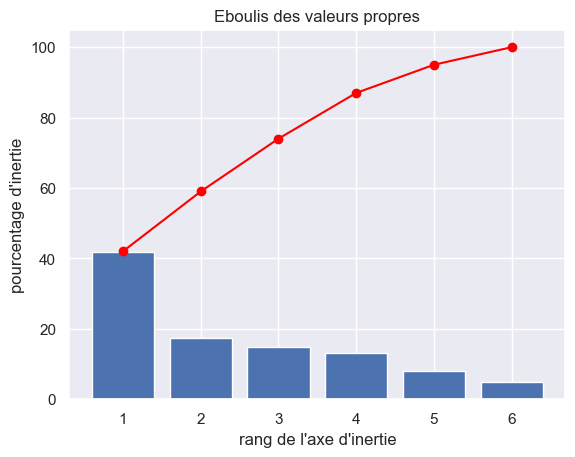

In [49]:
#Créez le scree plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Je vais utilisé 4 dimensions - 87% d'inertie

In [69]:
#Obtenez les composantes
pcs = pca.components_

#Créez un dataframe avec les composantes
pcs = pd.DataFrame(pcs)

In [51]:
features = analyse.copy().drop(columns='Zone').columns

In [52]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
F1                                               0.37                             
F2                                               0.44                             
F3                                               0.13                             
F4                                              -0.65                             
F5                                               0.46                             
F6                                              -0.16                             

    PIB (US$) par habitant  Stabilité Politique  \
F1                    0.55                 0.50   
F2                   -0.07                 0.17   
F3                   -0.15                 0.05   
F4                    0.16                -0.14   
F5                    0.16                -0.83   
F6                    0.79                -0.13   

    Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
F1                                               0.27                    
F2                                              -0.33                    
F3                                               0.86                    
F4                                               0.23                    
F5                                               0.13                    
F6                                              -0.13                    

    Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
F1                                              -0.16                                        
F2                                               0.82                                        
F3                                               0.26                                        
F4                                               0.47                                        
F5                                              -0.01                                        
F6                                               0.14                                        

    Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
F1                                               0.46                                                          
F2                                               0.02                                                          
F3                                              -0.40                                                          
F4                                               0.51                                                          
F5                                               0.25                                                          
F6                                              -0.55

<Axes: >

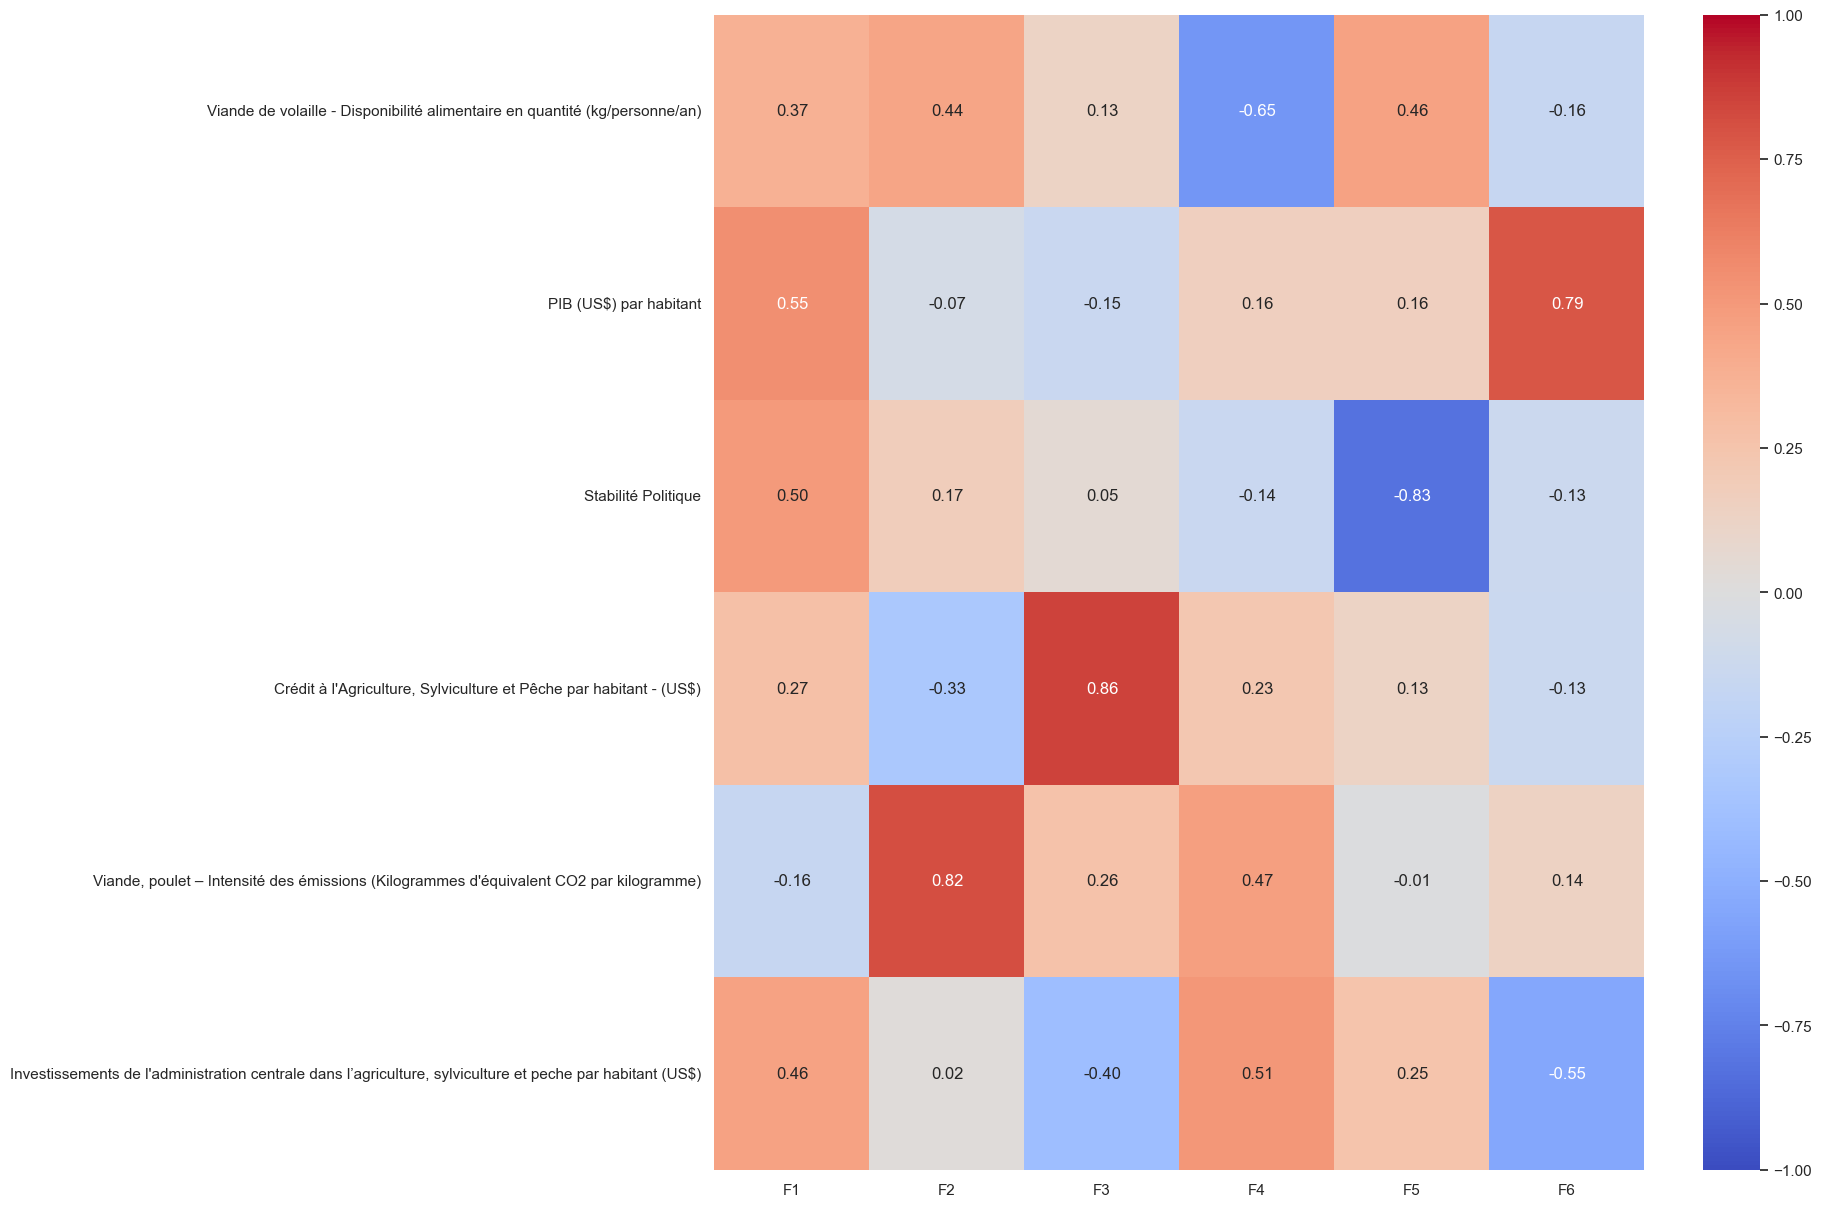

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [54]:
list(analyse)

['Zone',
 'Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

In [55]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

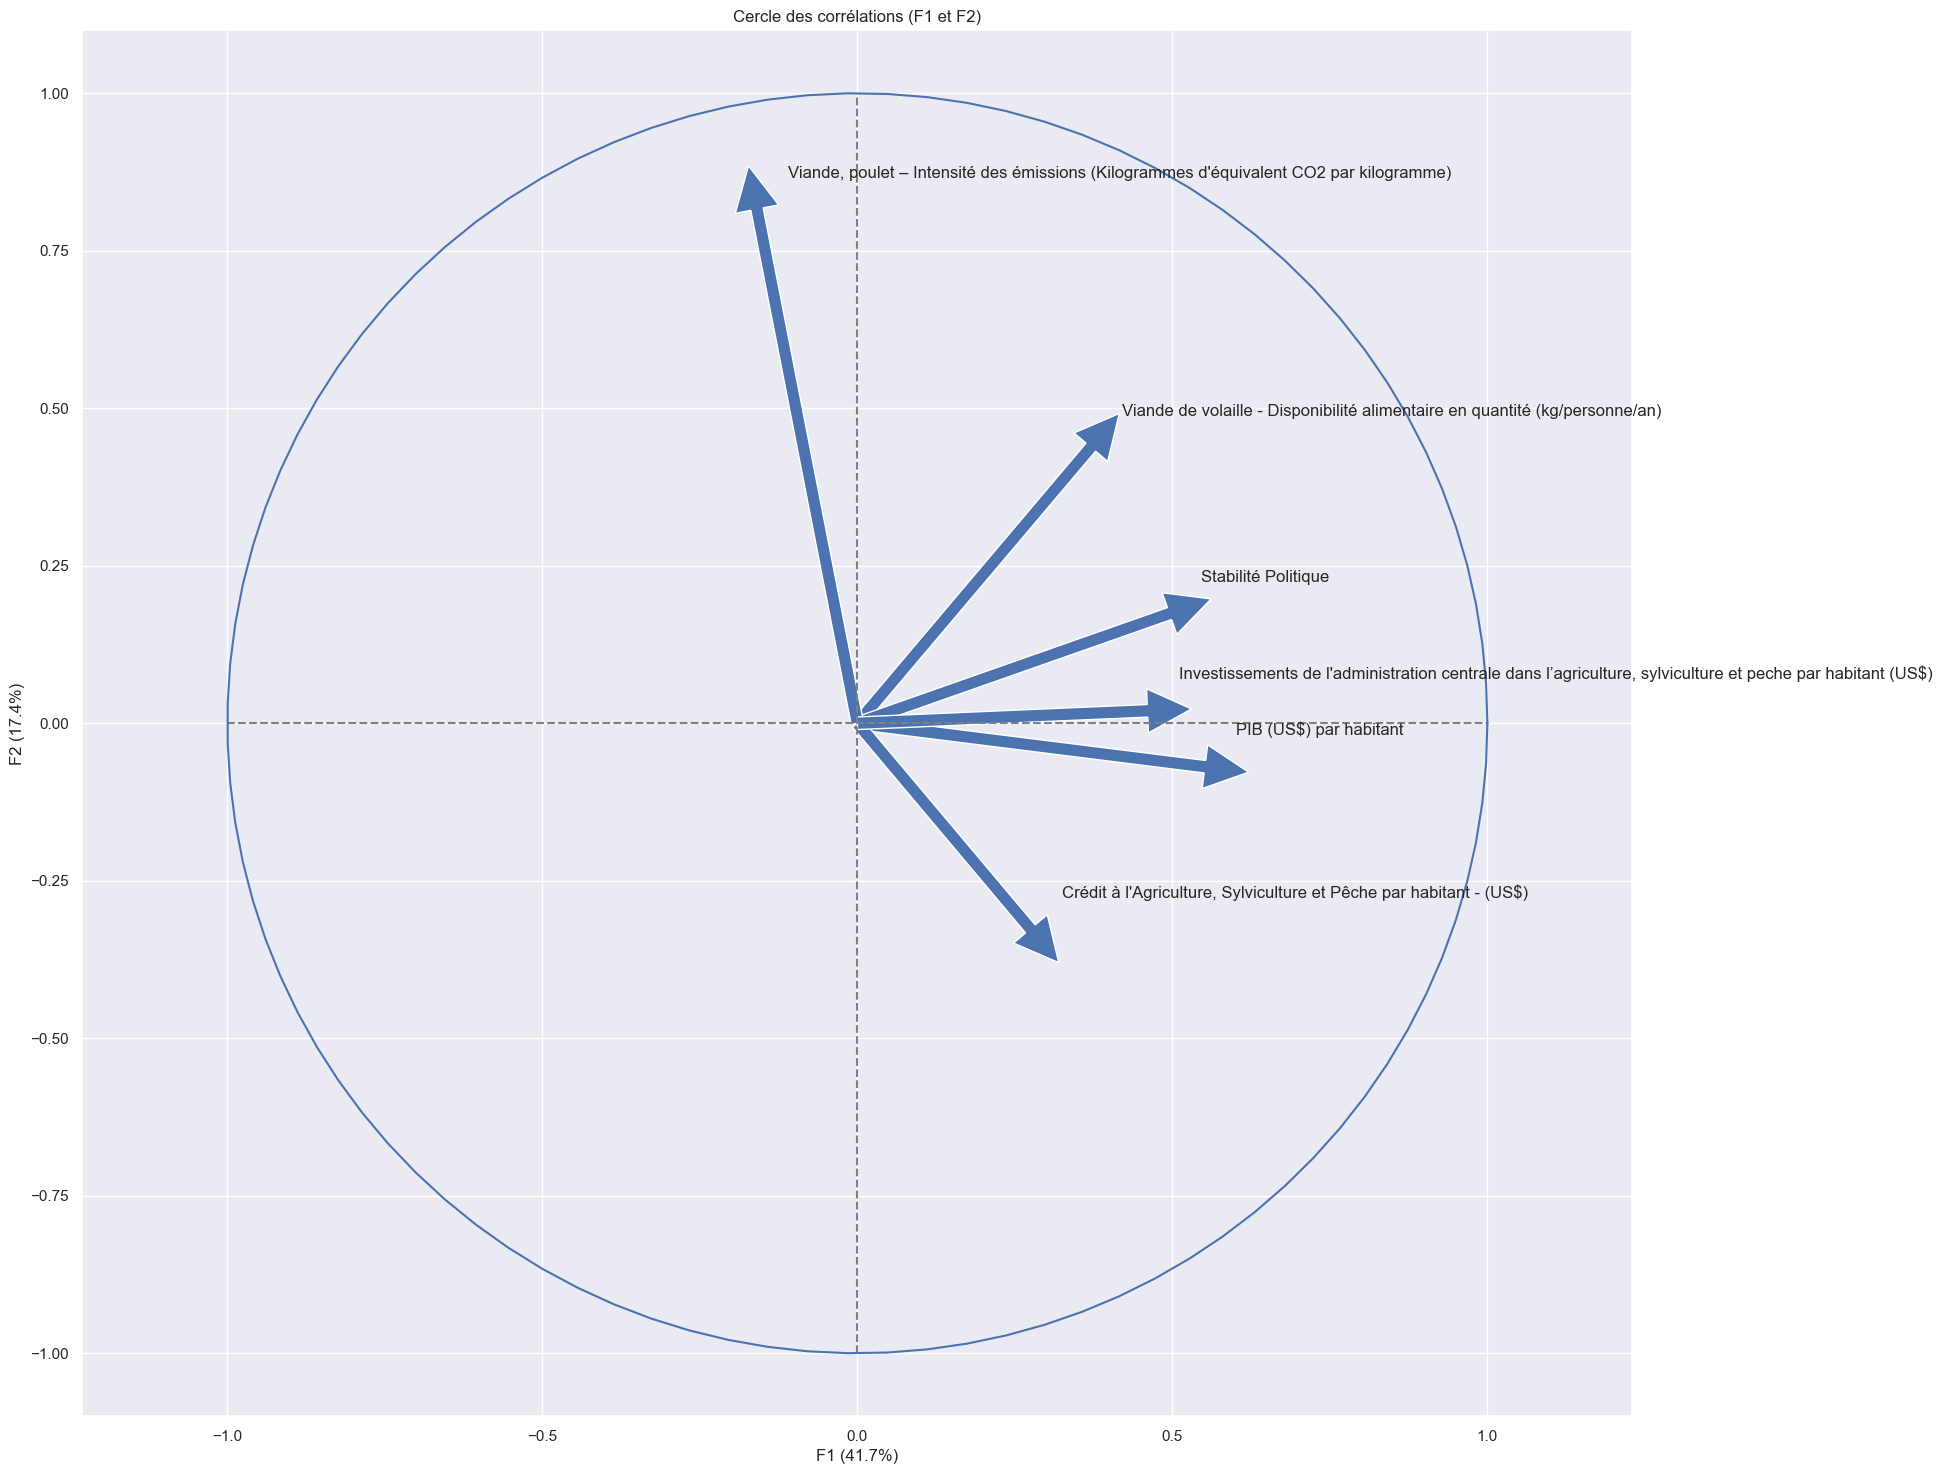

In [56]:
x_y = (0,1)

correlation_graph(pca, x_y, features)

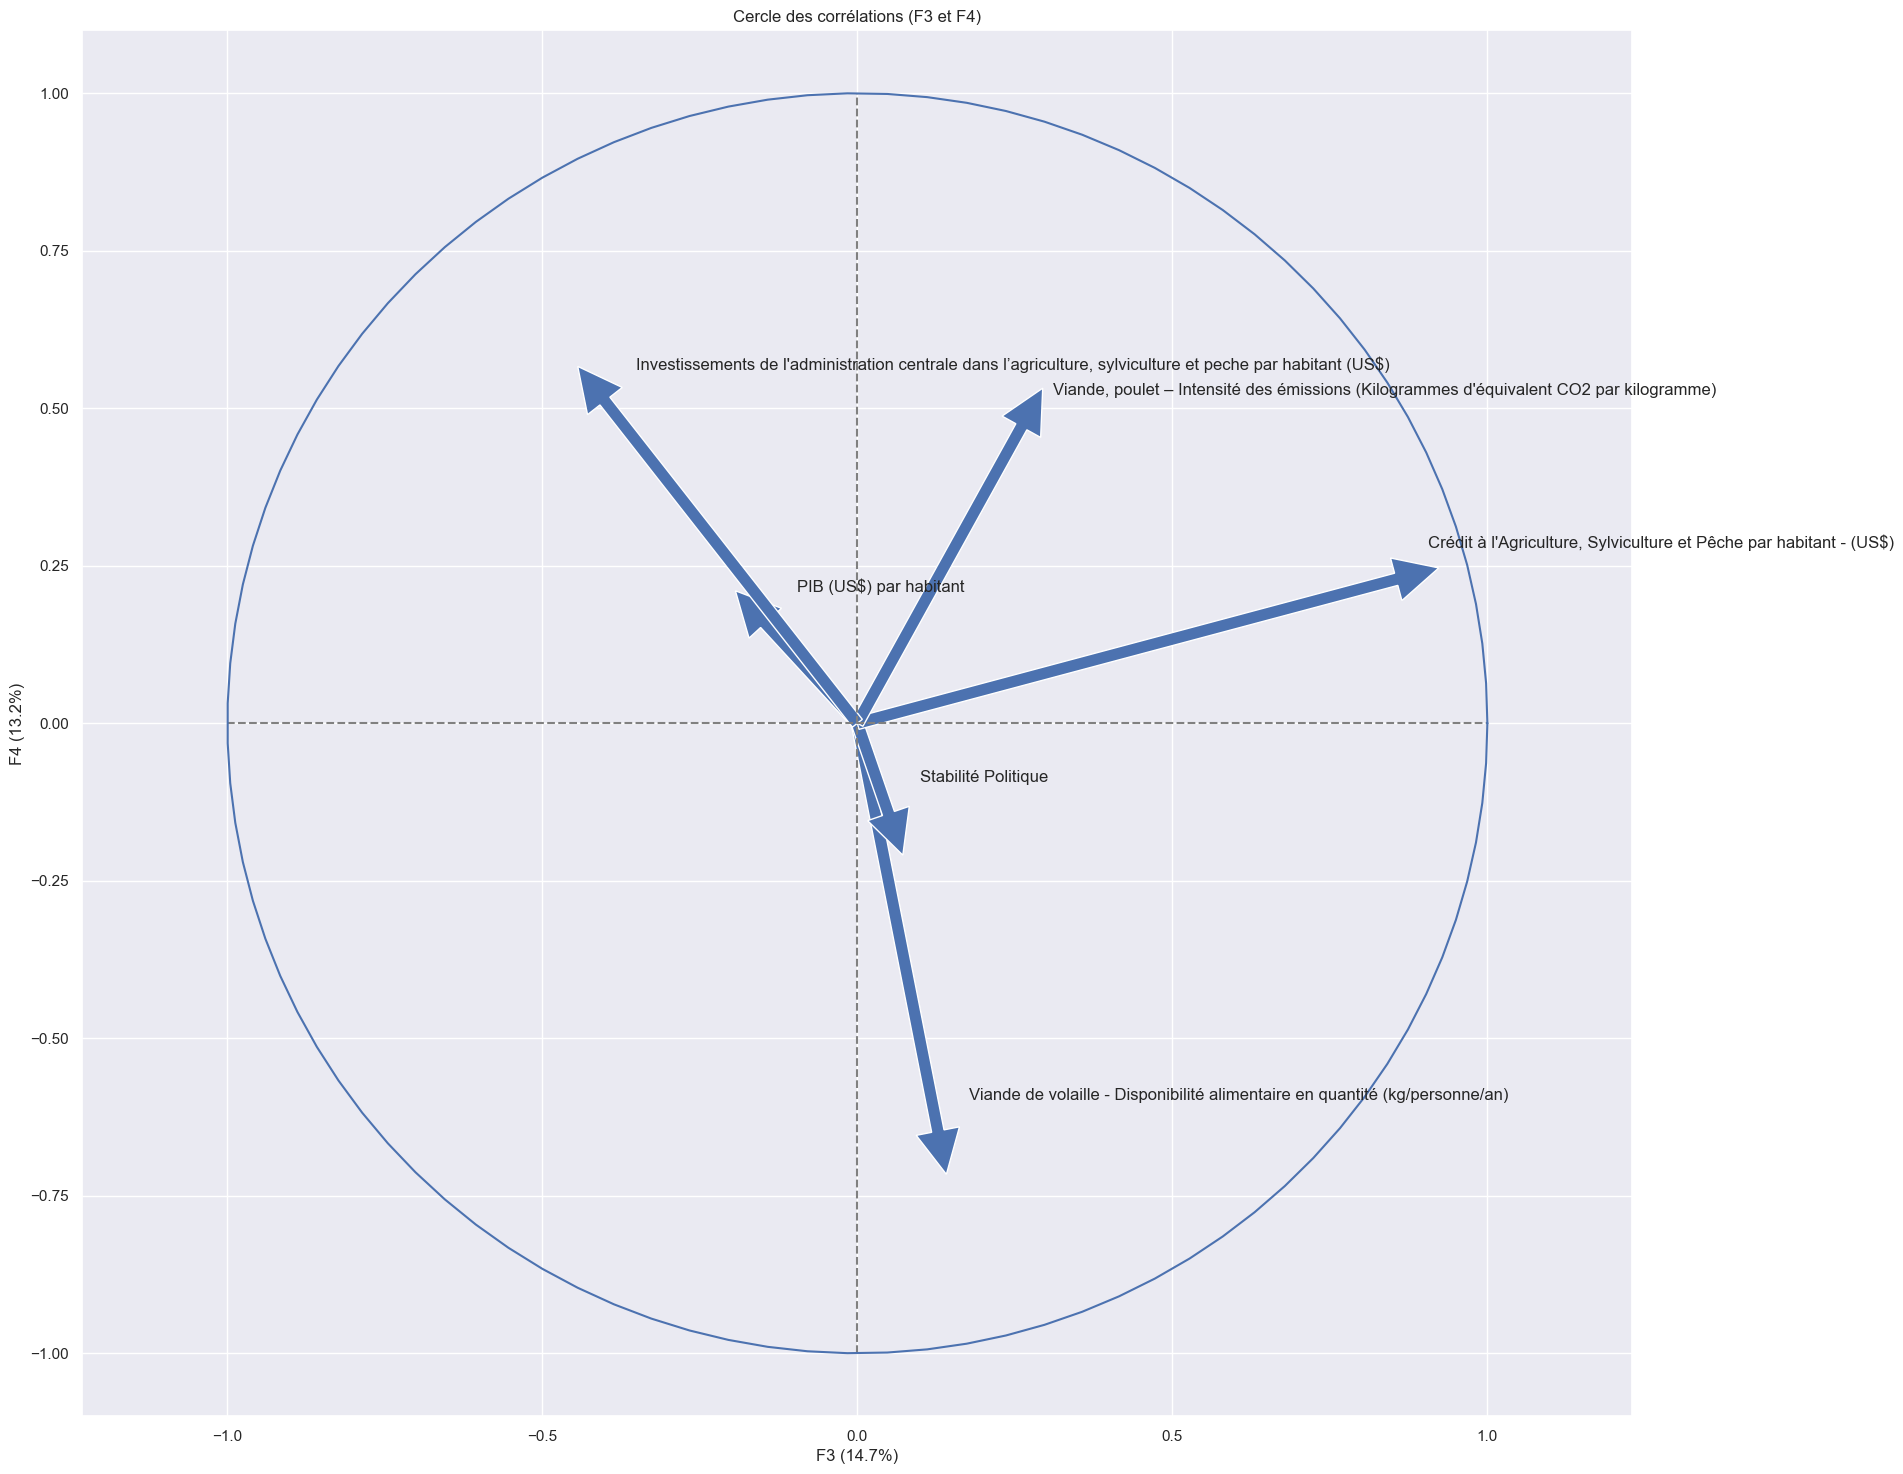

In [57]:
x_y = (2,3)

correlation_graph(pca, x_y, features)

- F1 - Rich countries have higher political stability and access to food
    - Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
    - PIB (US\\$) par habitant
    - Stabilité Politique
- F2 - If more chicken is available, it makes up a higher proportion of the diet
    - Volaille - percent de l'offre totale de viande et de poisson
    - Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
- F3 - Countries with less access to credit for agriculture but more government investment produce high levels of emissions
    - Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
    - Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US\\$)
    - Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US\\$)
- F4 - Countries with high access to credit for agriculture but low government investment also produce a lot of emissions. 
    - Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US\\$)
    - Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
    - Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US\\$)

In [58]:
#Calculez les coordonnées des individus dans le nouvel espace
X_proj = pca.fit_transform(X_scaled)
X_proj[:5]

array([[-2.63522628e+00, -1.34504074e+00, -4.04486856e-01,
         4.49000119e-01,  1.70007970e+00,  3.24455074e-01],
       [-1.05763263e-01, -6.21458891e-02,  2.16608683e-01,
        -1.17749671e+00,  4.73794029e-01, -2.38804228e-01],
       [-3.40909436e-01, -1.35179104e-01, -1.44617836e-01,
        -4.10748427e-01, -7.36786638e-01, -1.99733077e-01],
       [-1.15520487e+00, -3.61968638e-01, -1.59596020e-03,
         6.69938922e-01,  2.92169807e-01, -7.52225213e-02],
       [ 1.45821067e+00, -6.14276293e-01,  1.55423453e-01,
         6.42837809e-02, -2.94466490e-01,  1.01124134e+00]])

In [59]:
#Créez les factorial planes
def display_factorial_planes_interactive(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    """
    Affiche la projection des individus de manière interactive avec Plotly.

    Positional arguments:
    --------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x, y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments:
    --------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7, 6)

    # On gère les labels
    if labels is None:
        labels = []

    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")

    # On définit x et y
    x, y = x_y

    # Les points
    df = pd.DataFrame({'F1': X_[:, x], 'F2': X_[:, y], 'Labels': labels, 'Cluster': clusters})

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # Create an interactive scatter plot with hover labels
    fig = px.scatter(df, x='F1', y='F2', color='Cluster', size_max=20, opacity=alpha, hover_name='Labels')

    # Update layout for better presentation
    fig.update_layout(
        title=f"Projection des individus (sur F{x+1} et F{y+1})",
        xaxis_title=f'F{x+1} {"(explained variance: " + str(round(100*pca.explained_variance_ratio_[x])) + "%)" if pca else ""}',
        yaxis_title=f'F{y+1} {"(explained variance: " + str(round(100*pca.explained_variance_ratio_[y])) + "%)" if pca else ""}',
        xaxis_range=[-x_max, x_max],  # Set x-axis range
        yaxis_range=[-y_max, y_max],  # Set y-axis range
    )

    # Show the interactive plot
    fig.show()

In [60]:
names = analyse['Zone'].values

In [61]:
#Clustering de k-means - F1 et F2
display_factorial_planes_interactive(X_proj, [0, 1], pca, labels=names, figsize=(10, 20), clusters=df_kmeans['Cluster'], marker="o")

In [62]:
#Clustering de k-means - F3 et F4
display_factorial_planes_interactive(X_proj, [2, 3], pca, labels=names, figsize=(10, 20), clusters=df_kmeans['Cluster'], marker="o")

In [63]:
#Clustering de CAH - F1 et F2
display_factorial_planes_interactive(X_proj, [0, 1], pca, labels=names, figsize=(10, 20), clusters=df_CAH['cluster'], marker="o")


In [64]:
#Clustering de CAH - F3 et F4
display_factorial_planes_interactive(X_proj, [2, 3], pca, labels=names, figsize=(10, 20), clusters=df_CAH['cluster'], marker="o")


In [65]:
def display_pays_factorial(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    """
    Affiche la projection des individus de manière interactive avec Plotly.

    Positional arguments:
    --------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x, y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments:
    --------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."

    Returns:
    --------------------------
    df_projected : pd.DataFrame : DataFrame containing the projected values (F1, F2, F3, F4) for each individual (country)
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On gère les labels
    if labels is None:
        labels = []

    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")

    # On définit x et y
    x, y = x_y

    # Make sure all arrays have the same length
    if not (len(X_) == len(labels) == len(clusters)):
        raise ValueError("All arrays must be of the same length")

    # Les points
    df = pd.DataFrame({
        'F1': X_[:, x],
        'F2': X_[:, y],
        'F3': pca.components_[2, x] * X_[:, x] + pca.components_[2, y] * X_[:, y] if pca else np.nan,
        'F4': pca.components_[3, x] * X_[:, x] + pca.components_[3, y] * X_[:, y] if pca else np.nan,
        'Labels': labels,
        'Cluster': clusters
    })

    # Return the DataFrame with projected values
    return df

In [66]:
#Créer un dataframe avec les pays et leurs valeurs pour chaque 'factorial plane'
Pays_F = display_pays_factorial(X_proj, [0, 1], pca, labels=names, clusters=df_kmeans['Cluster'], figsize=(10, 20), marker="o")

In [67]:
# Trouver les top 10 pays en termes de valeurs pour chaque factorial plane

# Top 10 pays - F1 - Prospérité économique
F1 = Pays_F[['Labels', 'F1']].sort_values(by='F1', ascending=False).head(10)
# Top 10 pays - F2 - Quantité d’émissions (valeurs ascendant parce que moins est mieux)
F2 = Pays_F[['Labels', 'F2']].sort_values(by='F2').head(10)
# Top 10 pays - F3 - Crédit à l'agriculture 
F3 = Pays_F[['Labels', 'F3']].sort_values(by='F3', ascending=False).head(10)
# Top 10 pays - F4 - Besoin d'investissement dans l'agriculture (valeurs ascendant parce que moins est mieux)
F4 = Pays_F[['Labels', 'F4']].sort_values(by='F4').head(10)

In [74]:
# Comptez le nombre de fois où les pays se classent parmi les 10 premiers pays en termes de plans factoriels (max 4)

# Liste de dataframes
dataframes = [F1, F2, F3, F4]

# Initialiser une dictionnaire avec le nombre de 
country_counts = {}

# Parcourez chaque DataFrame et comptez le nombre de fois où le pays se trouve dans le top 10 d'un plan factoriel
for df in dataframes:
    unique_countries = set(df['Labels'])
    for country in unique_countries:
        country_counts[country] = country_counts.get(country, 0) + 1

# Convertir le dictionnaire en une liste de tuples (pays, nombre)
countries_and_counts = list(country_counts.items())
countries_counts = pd.DataFrame(countries_and_counts, columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

In [75]:
# Trouvez les pays qui sont dans le top 10 pour 3/4 ou 4/4 plans factoriels
countries_counts = countries_counts[countries_counts['Count'].isin([3,4])]
countries_counts

Country  Count
9       Nouvelle-Zélande      4
6                Norvège      3
10              Pays-Bas      3
1              Australie      3
7             Luxembourg      3
0   Chine - RAS de Macao      3
5                Irlande      3
4               Finlande      3
3                Islande      3
2                 Suisse      3

In [ ]:
investigate_countries = countries_counts['Count'].isin([3, 4])

In [76]:
countries = ['Pays-Bas', 'Suède', 'Australie', 'Nouvelle-Zélande', 'Finlande',
       'Luxembourg', 'Suisse', 'Norvège', 'Irlande', 'Islande', 'Chine - RAS de Macao']
population = pd.read_csv('analyse_population.csv')
population = population[population['Zone'].isin(countries)]

interesting_countries = pd.merge(population, analyse, how='left', on='Zone')
interesting_countries

Zone  Population  \
0              Australie  24584620.0   
1   Chine - RAS de Macao    622585.0   
2               Finlande   5511371.0   
3                Irlande   4753279.0   
4                Islande    334393.0   
5             Luxembourg    591910.0   
6                Norvège   5296326.0   
7       Nouvelle-Zélande   4702034.0   
8               Pays-Bas  17021347.0   
9                  Suède   9904896.0   
10                Suisse   8455804.0   

    Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               47.65                             
1                                               34.47                             
2                                               18.76                             
3                                               25.82                             
4                                               29.95                             
5                                               18.33                             
6                                               19.05                             
7                                               34.79                             
8                                               20.33                             
9                                               16.60                             
10                                              15.72                             

    PIB (US$) par habitant  Stabilité Politique  \
0             57444.151955                 0.90   
1             81018.552734                 1.43   
2             46385.550876                 1.08   
3             70767.463926                 1.00   
4             73949.769215                 1.35   
5            111017.182246                 1.33   
6             75220.814442                 1.17   
7             43943.484628                 1.60   
8             48989.638816                 0.92   
9             54621.345824                 0.98   
10            83313.013992                 1.26   

    Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
0                                         2115.878640                    
1                                          261.808033                    
2                                          339.003923                    
3                                          929.026829                    
4                                          261.808033                    
5                                          261.808033                    
6                                          261.808033                    
7                                         9147.009709                    
8                                         2291.704118                    
9                                          261.808033                    
10                                        1169.778908                    

    Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
0                                              0.2235                                        
1                                              0.7279                                        
2                                              0.1376                                        
3                                              0.2934                                        
4                                              0.0078                                        
5                                              0.1872                                        
6                                              0.4311                                        
7                                              0.3147                                        
8                                              0.1977                                        
9                                              0.0414                                        
10    

**Australasie**
- Avantages
    - *L'Australie a une grande population et, parmi les pays de cette liste, la Nouvelle-Zélande et l'Australie ont la plus grande quantité de poulet disponible comme nourriture.*  
- Inconvénients
    - *Loin de la France - difficile de gérer une entreprise à distance, et les lois et réglementations seront différentes de celles de l'UE et de la France, ce qui pourrait rendre l'entreprise plus difficile à gérer.*  
<p>&nbsp;</p>

**Europe (pays de l'UE)**
- Stratégie
    - *Commencez par vous concentrer sur les Pays-Bas et l'Irlande, qui présentent un bon équilibre entre la taille de la population et la quantité de poulet disponible.*
- Avantages
    - *Ces 2 pays font partie de l'UE - l'exportation de poulet aura des coûts relativement faibles, surtout par rapport à ceux requis pour exporter vers l'Australasie, et les lois et réglementations seront standardisées dans toute l'UE, et donc plus faciles à respecter.*
- Inconvénients
    - *Poulet dispo est plus faible qu'en Australasie et les populations sont plus distribuées*
<p>&nbsp;</p>

**Macao** - La population de Macao est trop petite et le pays est trop éloigné des autres pays pour qu'il vaille la peine d'y investir.